In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import kaleido

In [2]:
# Import Data
df = pd.read_csv('../data/cleaning_data_phase2.csv.zip')

# Ran's EDA

In [3]:
#Columns that Ran will EDA on
columns = [
    '_michd', '_sex', 'genhlth',
    'physhlth', 'menthlth', 'addepev3',
    'checkup1', '_totinda', '_rfhype6',
    'cholmed3', '_rfchol3', 'cvdstrk3',
    '_asthms1', 'chcscncr','chcocncr'
]

#Saving Ran's features to datframe
df_ran = df[columns].copy()

df_ran.head(2)

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No


In [4]:
df_ran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414511 entries, 0 to 414510
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _michd    414511 non-null  object 
 1   _sex      414511 non-null  object 
 2   genhlth   414511 non-null  object 
 3   physhlth  406020 non-null  float64
 4   menthlth  407427 non-null  float64
 5   addepev3  414511 non-null  object 
 6   checkup1  414511 non-null  object 
 7   _totinda  414511 non-null  object 
 8   _rfhype6  414511 non-null  object 
 9   cholmed3  414511 non-null  object 
 10  _rfchol3  414511 non-null  object 
 11  cvdstrk3  414511 non-null  object 
 12  _asthms1  414511 non-null  object 
 13  chcscncr  414511 non-null  object 
 14  chcocncr  414511 non-null  object 
dtypes: float64(2), object(13)
memory usage: 47.4+ MB


In [5]:
# Map target variable 
df_ran['Heart_Disease'] = df_ran['_michd'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
# Map columns to readable description
cat_columns_description = {
    '_michd': 'Heart Disease',
    '_sex': 'Sex',
    'genhlth': 'General Health Status',
    'addepev3': 'Depressive Disorder',
    'checkup1': 'General Physical Exam',
    '_totinda': 'Physical Activity',
    '_rfhype6': 'High Blood Pressure',
    'cholmed3': 'Currently Taking Medicine For High Cholesterol',
    '_rfchol3': 'High Cholesterol',
    'cvdstrk3': 'Stroke',
    '_asthms1': 'Asthma Status',
    'chcscncr': 'Skin Cancer',
    'chcocncr': 'Other Cancer'
}

num_columns_description = {
    'physhlth': 'Number of Days Physical Health Not Good',
    'menthlth': 'Number of Days Mental Health not Good'
}

In [7]:
# Creating barchart of count by different columns with or without heart disease
def cat_count_eda(col):
    plt.figure(figsize = (10, 6))
    ax = sns.barplot(y = df_ran[col].value_counts().index, x = df_ran[col].value_counts().values)
    ax.bar_label(ax.containers[0])
    plt.title(f'Count by {cat_columns_description[col]}', size = 20)
    plt.xlabel('Count', size = 15)
    plt.ylabel(f'{cat_columns_description[col]}', size = 15);
    if col == '_michd':
        plt.savefig(f'../graph/{cat_columns_description[col]}.png')

In [8]:
# Creating barchar of frequency of heart disease for different types of each columns
def cat_disease_frequency(c):
    plt.figure(figsize = (10, 6))
    cur_df = df_ran.groupby(c).agg({'Heart_Disease': 'mean'})
    cur_df.sort_values('Heart_Disease', ascending = False, inplace = True)
    cur_df['Heart_Disease'] = cur_df['Heart_Disease'].apply(lambda x: round(x, 2))
    ax = sns.barplot(x = cur_df['Heart_Disease'], y = cur_df.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Frequency of Heart Disease for different types of {cat_columns_description[c]}', size = 20)
    plt.xlabel('Frequency of Heart Disease', size = 15)
    plt.ylabel(f'Type of {cat_columns_description[c]}', size = 15);

## Categorical Varaibles
- If the categories 'Don't know/Not sure' and 'Refused' account for a very small fraction of the total responses, I will not be focusing on them in our analysis.

### _michd: Target Variable, Heart Disease

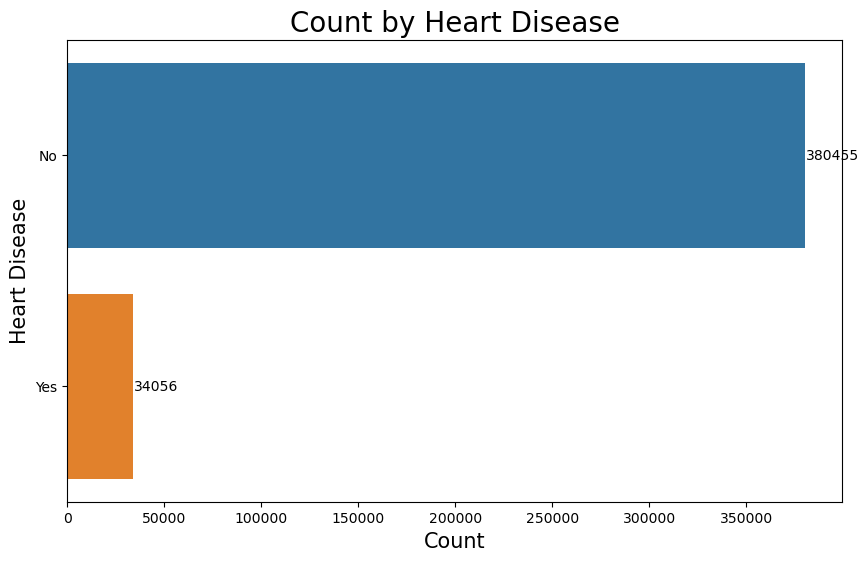

In [9]:
cat_count_eda('_michd')

Our dataset exhibits significant imbalance with respect to heart disease occurrence. Specifically, the number of individuals without heart disease is ten times greater than those diagnosed with the condition.

### _sex: sex

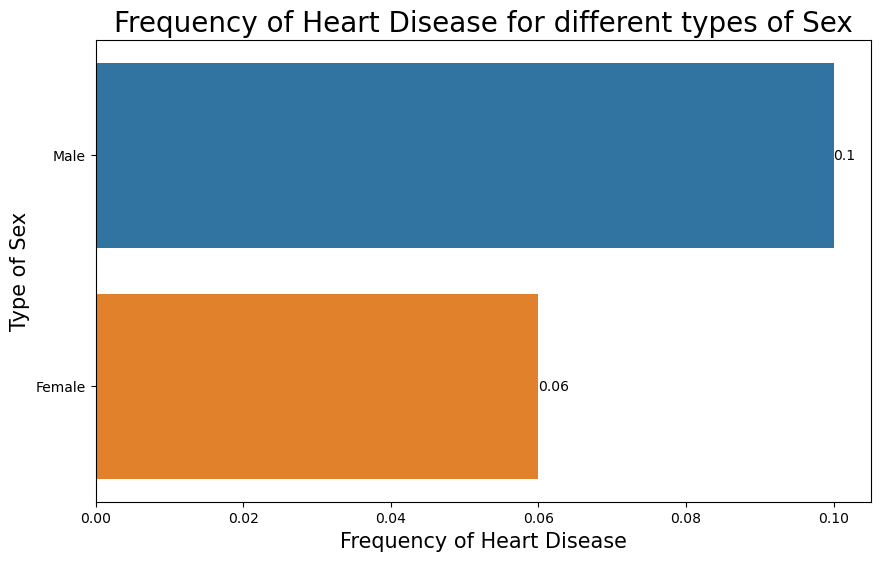

In [10]:
cat_disease_frequency('_sex')

In our dataset, the proportion of heart disease in males is 0.1, while for females it is 0.06. This suggests that men in this dataset appear to have a higher likelihood of developing heart disease compared to women.

### genhlth: General Health Status

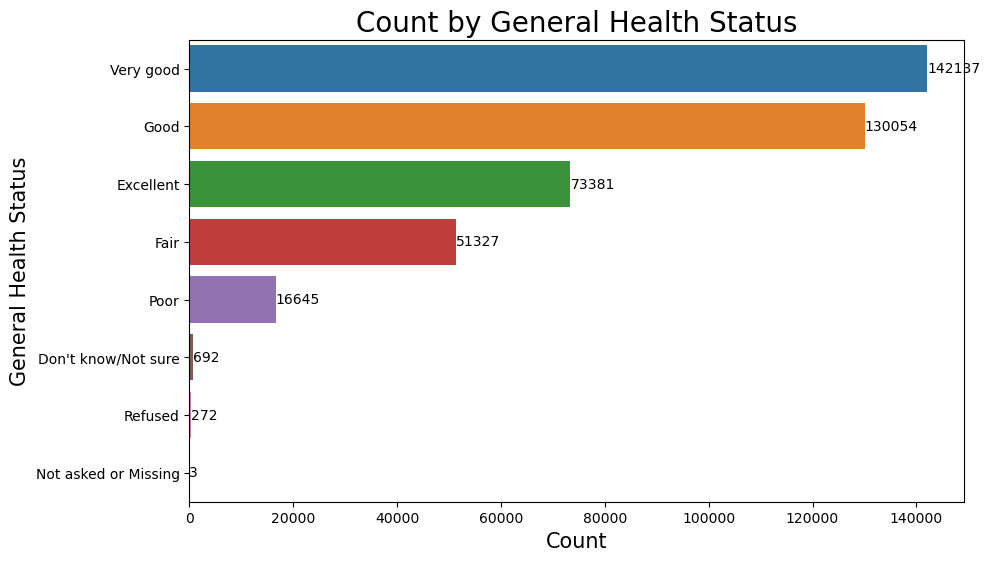

In [11]:
cat_count_eda('genhlth')

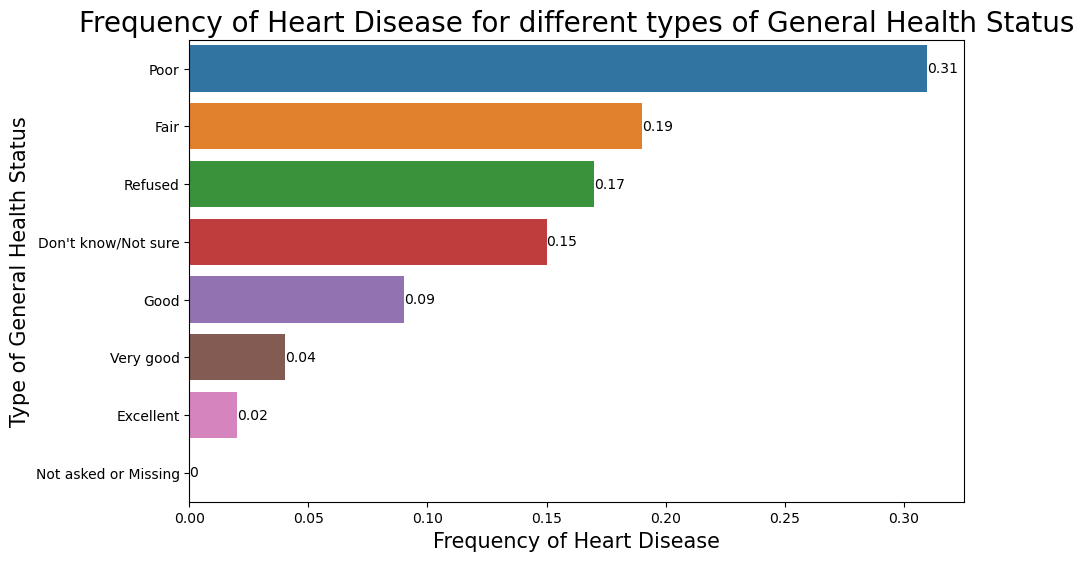

In [12]:
cat_disease_frequency('genhlth')

It suggests a potential relationship between health status and the prevalence of heart disease, with heart disease being less common among individuals who perceive their health as better.

### addepev3: Depressive Disorder

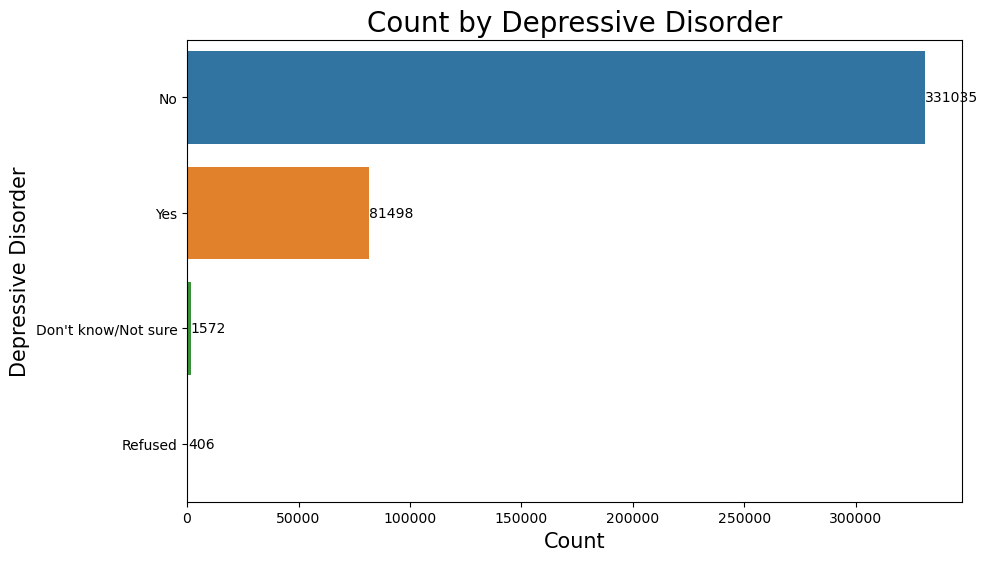

In [13]:
cat_count_eda('addepev3')

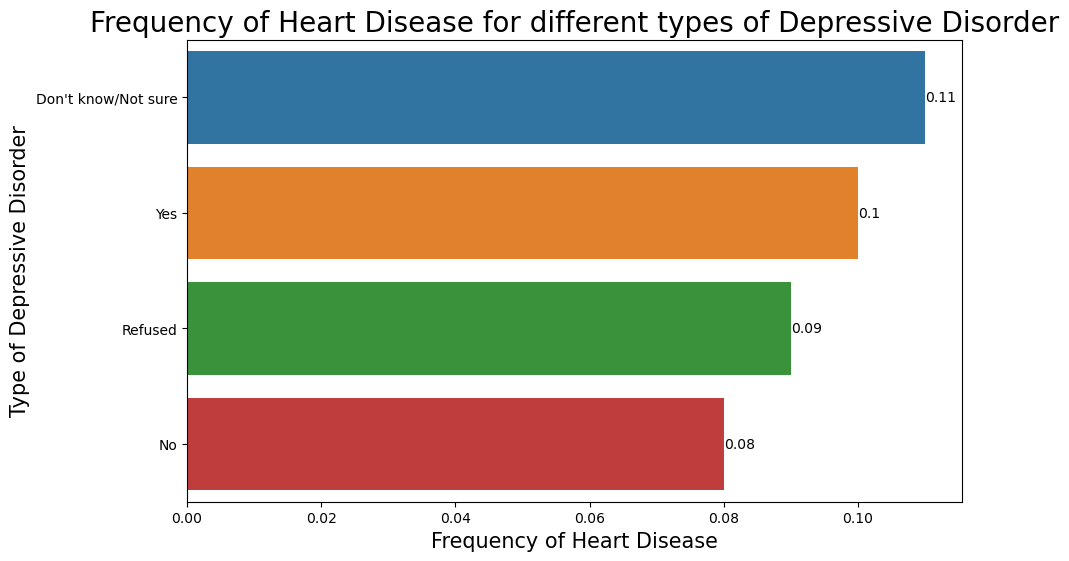

In [14]:
cat_disease_frequency('addepev3')


It suggests a potential relationship between Depressive Disorder and the prevalence of heart disease, with heart disease being more common among individuals who has depressive disorder.

### checkup1: General Physical Exam

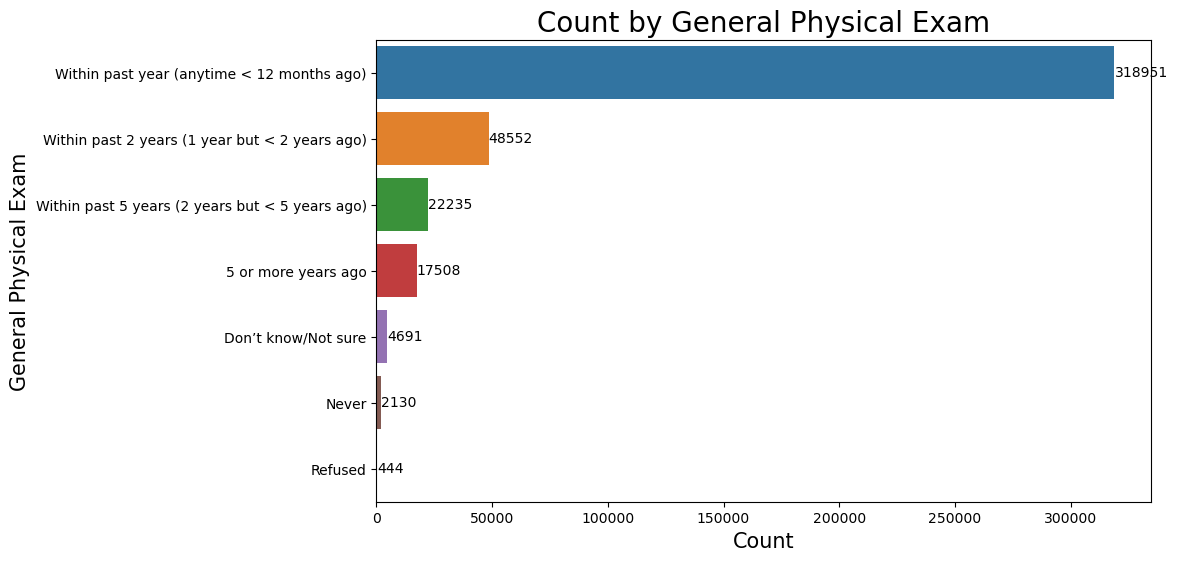

In [15]:
cat_count_eda('checkup1')

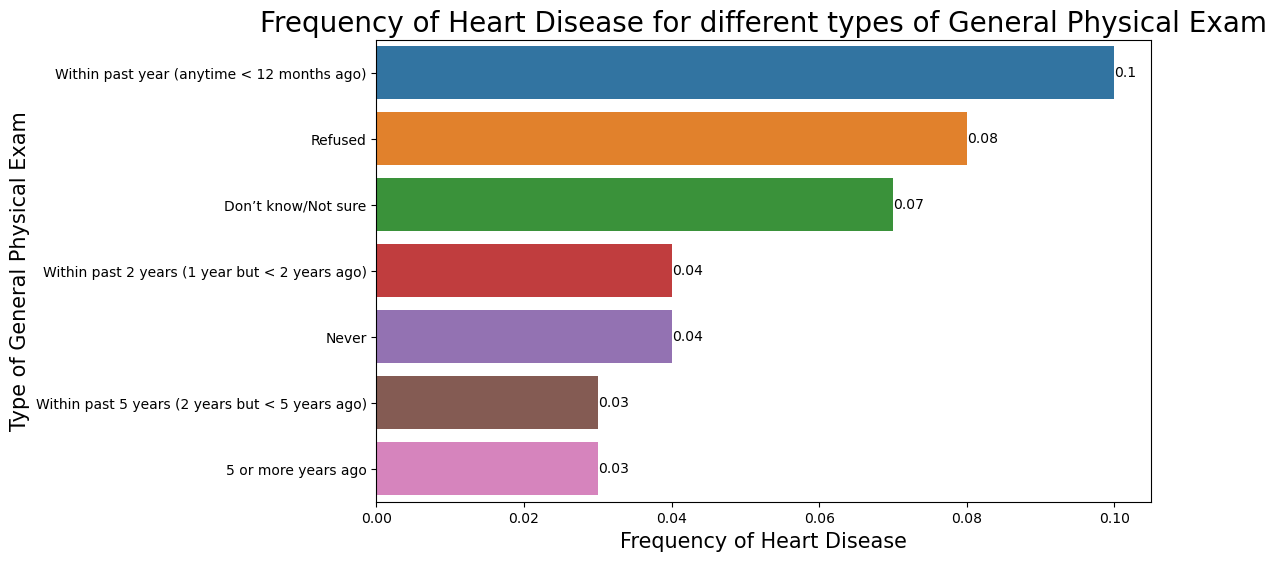

In [16]:
cat_disease_frequency('checkup1')

It looks like no relationship between heart disease and general physical exam

### _totinda: Physical Activity

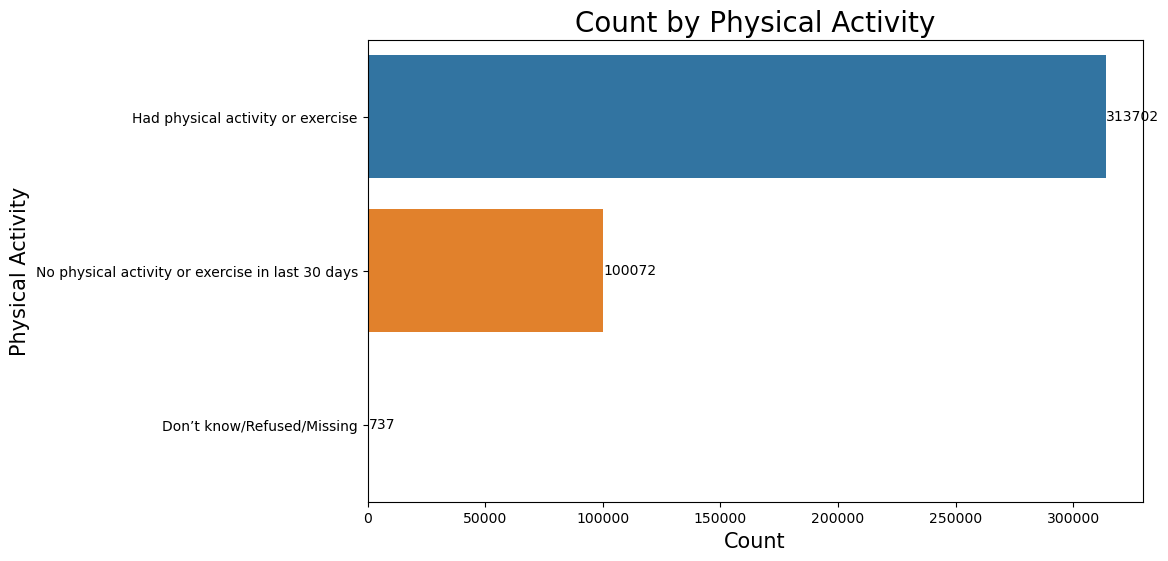

In [17]:
cat_count_eda('_totinda')

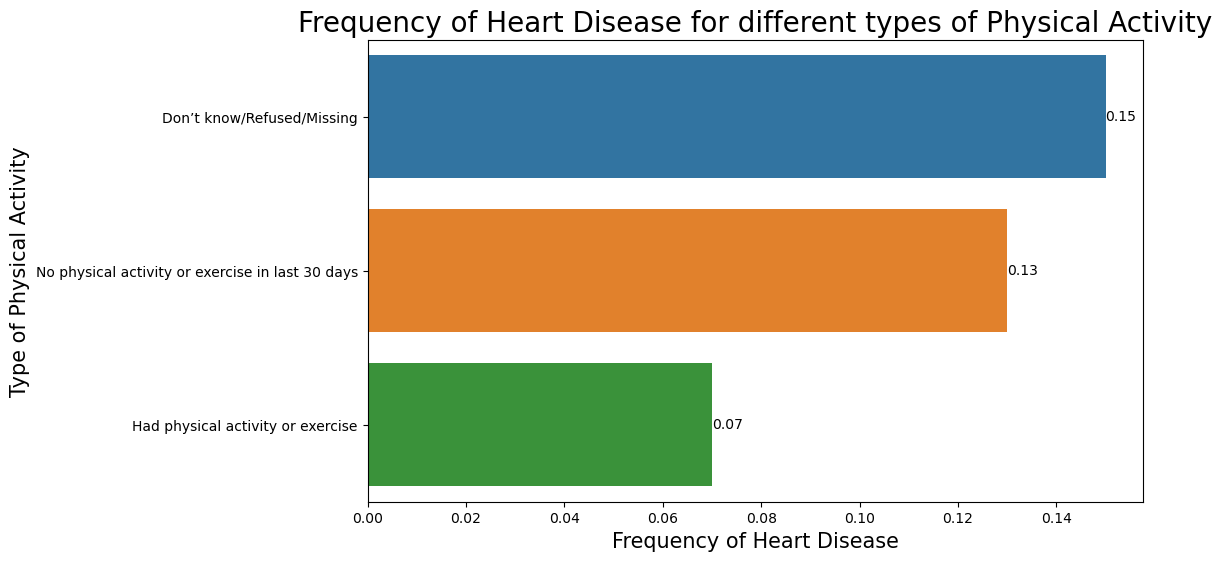

In [18]:
cat_disease_frequency('_totinda')

It suggests a potential relationship between phyisical activity in last 30 days and the prevalence of heart disease, with heart disease being more common among individuals who didn't have physical activity or exercise.

### _rfhype6: High Blood Pressure

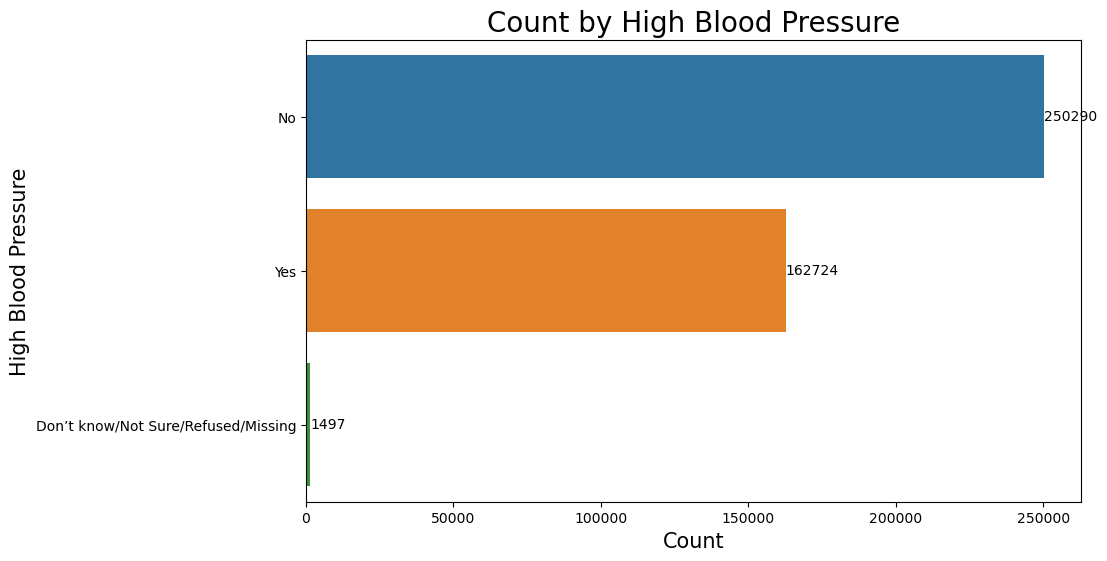

In [19]:
cat_count_eda('_rfhype6')

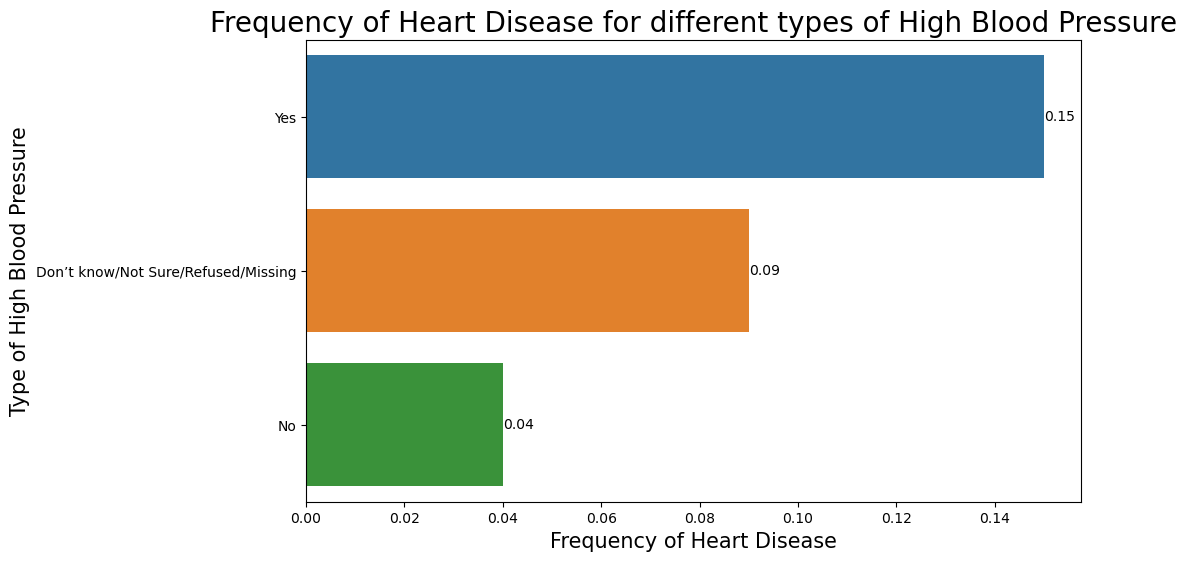

In [20]:
cat_disease_frequency('_rfhype6')

It suggests a potential relationship between high blood pressure and the prevalence of heart disease, with heart disease being more common among individuals who has high blood pressure.

### cholmed3: Currently Taking Medicine For High Cholesterol

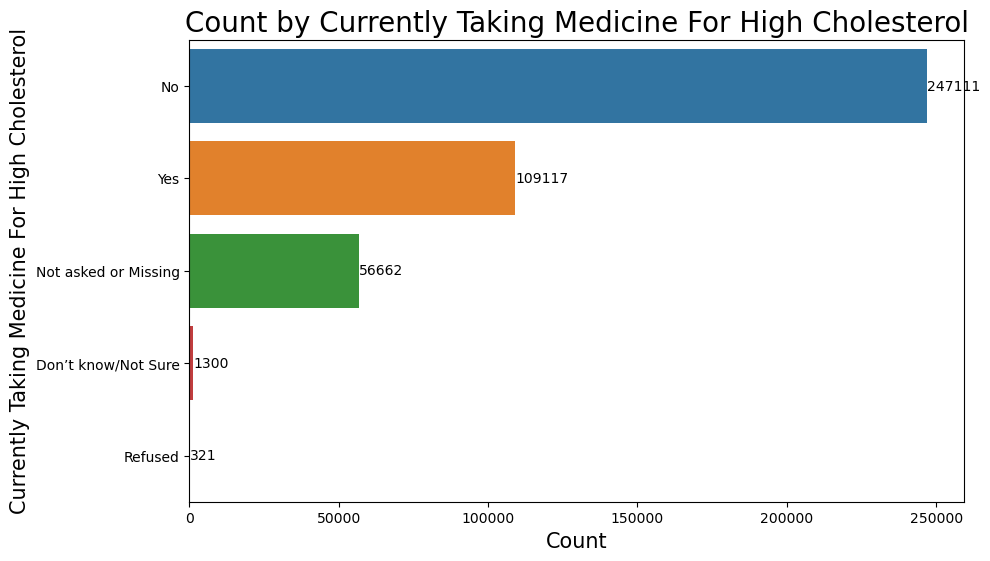

In [21]:
cat_count_eda('cholmed3')

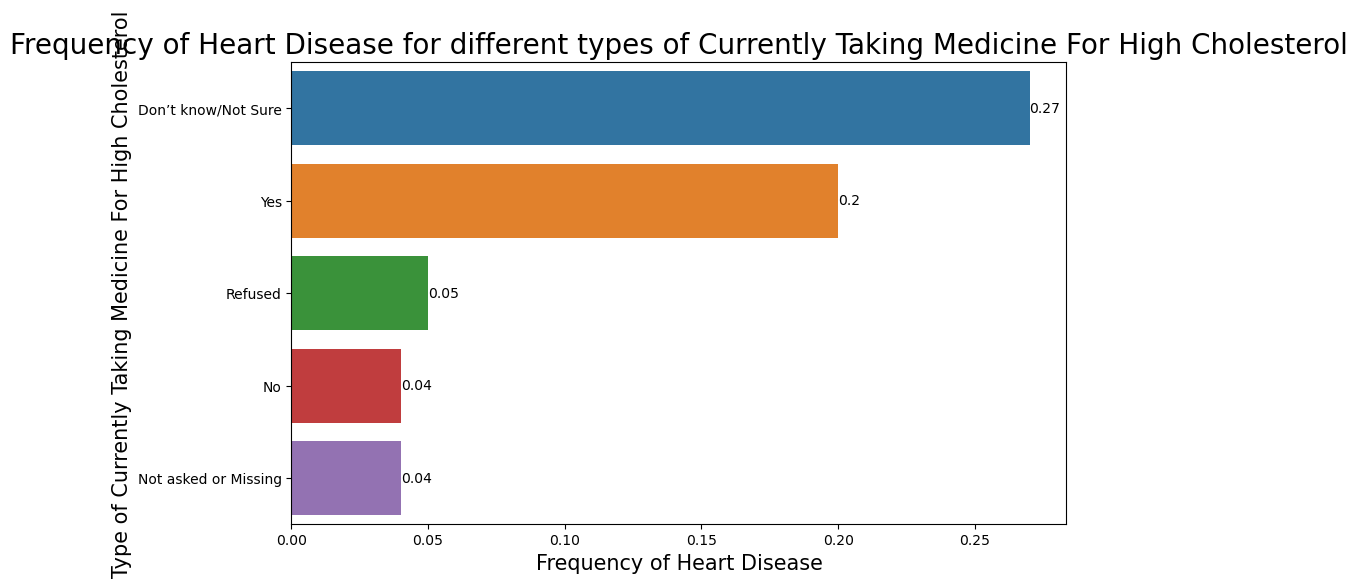

In [22]:
cat_disease_frequency('cholmed3')

It suggests a potential relationship between taking medicine for high cholesterol and the prevalence of heart disease, with heart disease being more common among individuals who are using medicine for high cholesterol.
Interestingly, we see a significant number of over 50,000 responses falling under the category of "Not asked or Missing". This group has the lowest incidence of heart disease. This could possibly be due to these individuals never having experienced these situations, and hence, not being asked the relevant questions.

### _rfchol3: High Cholesterol

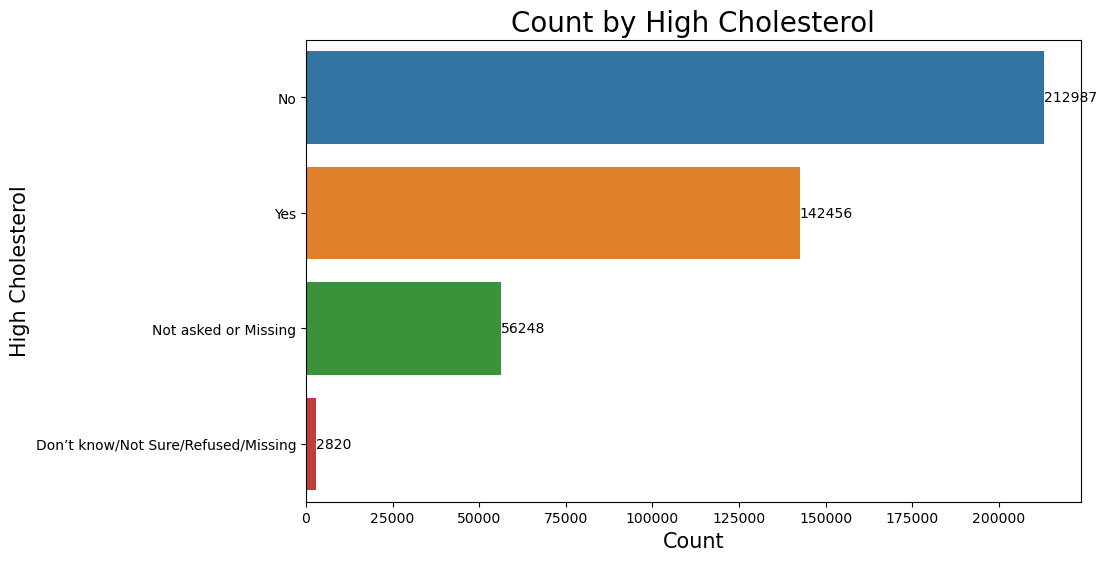

In [23]:
cat_count_eda('_rfchol3')

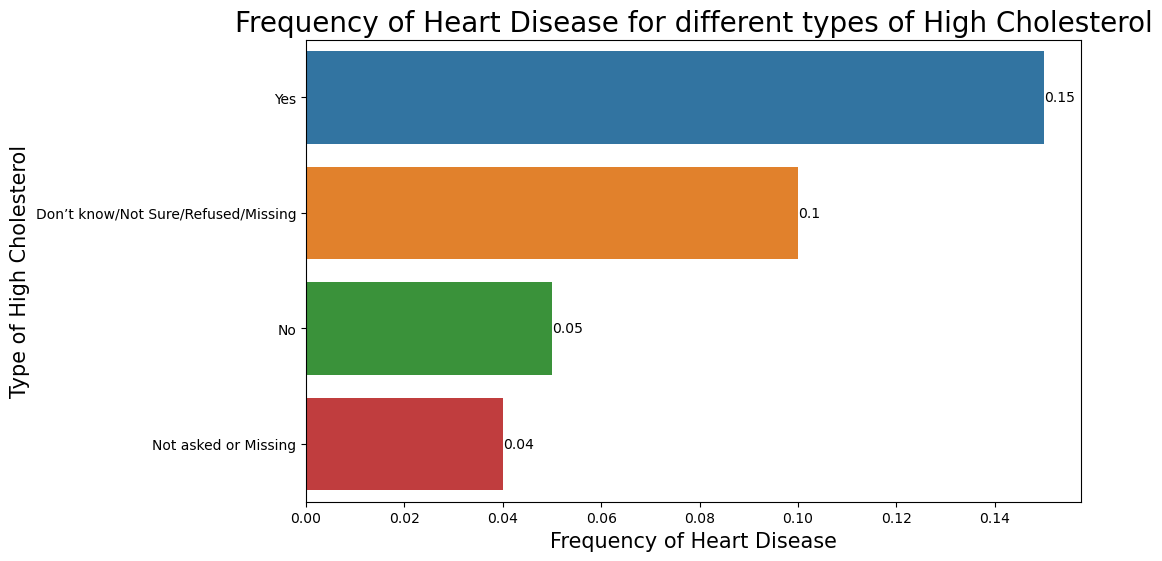

In [24]:
cat_disease_frequency('_rfchol3')

It suggests a potential relationship between high cholesterol and the prevalence of heart disease, with heart disease being more common among individuals who has high cholesterol.
The class of "Not asked or Missing" in high cholesterol has the same charateristic as the feature taking medicine for high cholesterol. This group has the lowest incidence of heart disease. This could possibly be due to these individuals never having experienced these situations, and hence, not being asked the relevant questions.

### cvdstrk3: Stroke

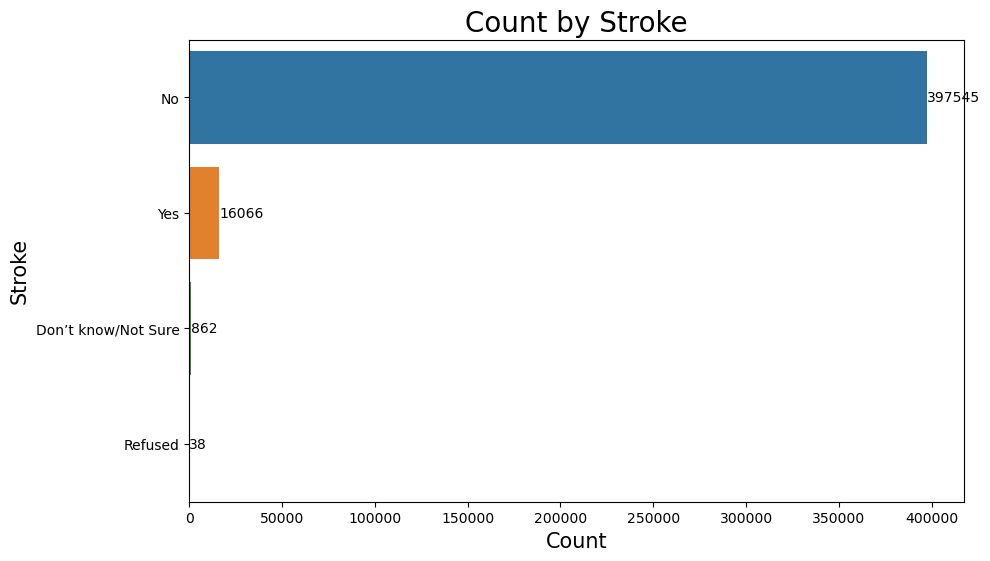

In [25]:
cat_count_eda('cvdstrk3')

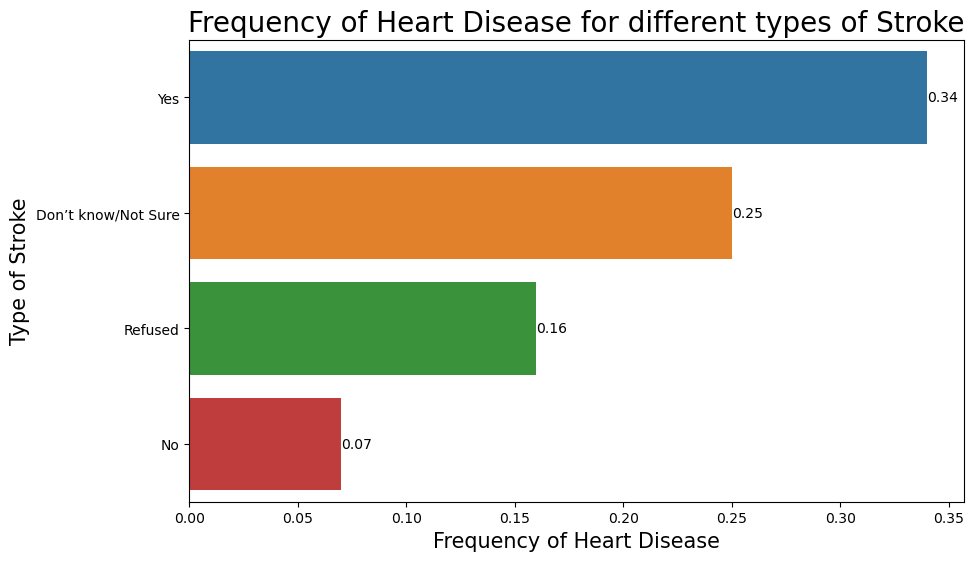

In [26]:
cat_disease_frequency('cvdstrk3')

It suggests a potential relationship between stroke and the prevalence of heart disease, with heart disease being more common among individuals who had stroke.

### _asthms1: Asthma Status

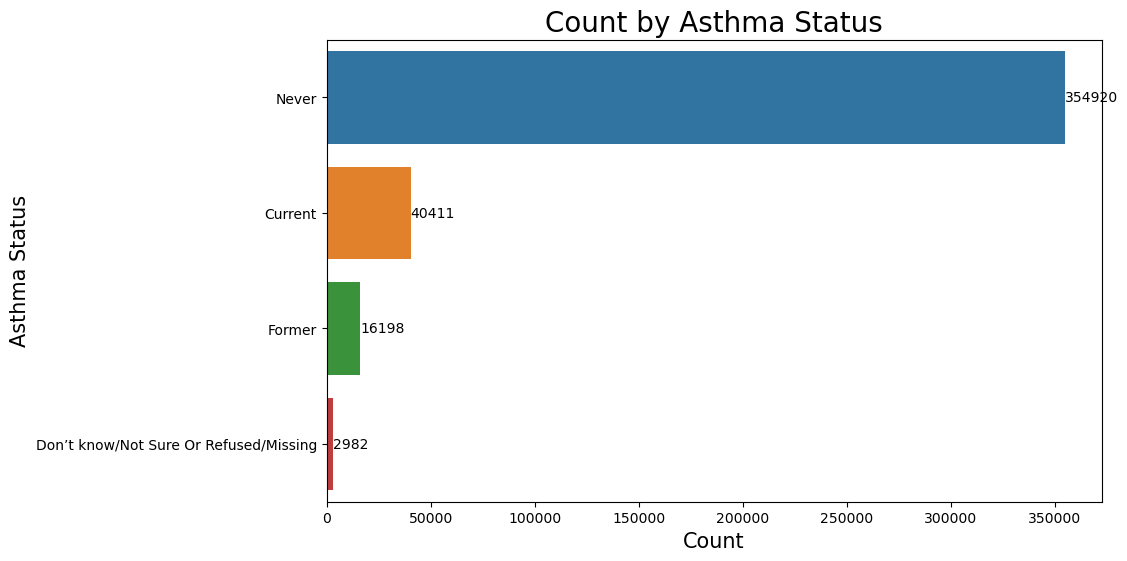

In [27]:
cat_count_eda('_asthms1')

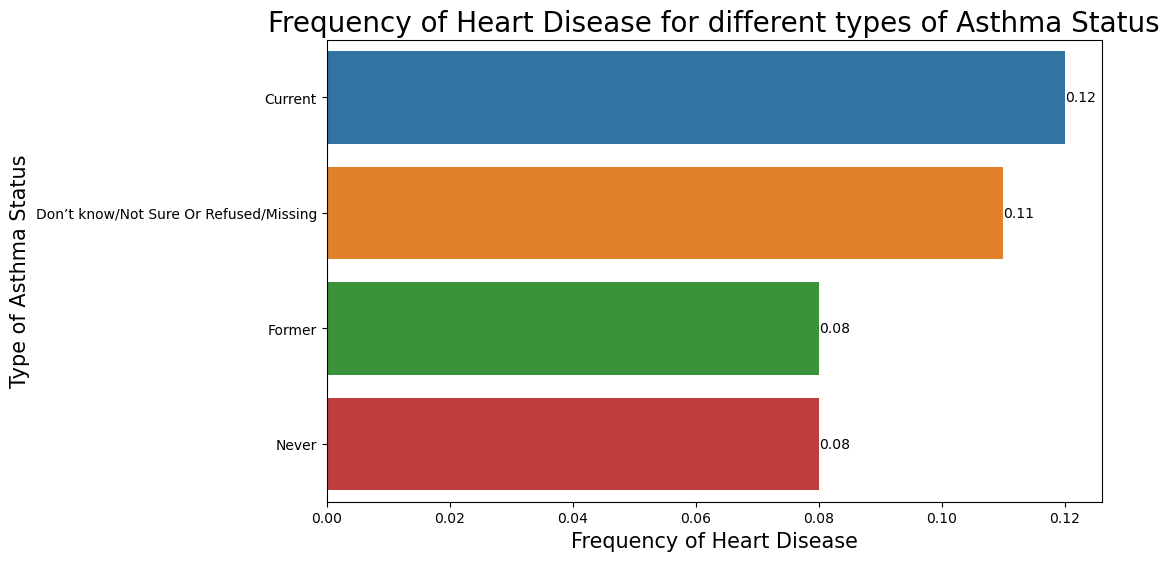

In [28]:
cat_disease_frequency('_asthms1')

It suggests a potential relationship between Asthma Status and the prevalence of heart disease, with heart disease being more common among individuals who currently has Asthma. 
Interestingly, it appears that the group of individuals who have never had asthma and those who have recovered from asthma show a similar proportion.

### chcscncr: Skin Cancer

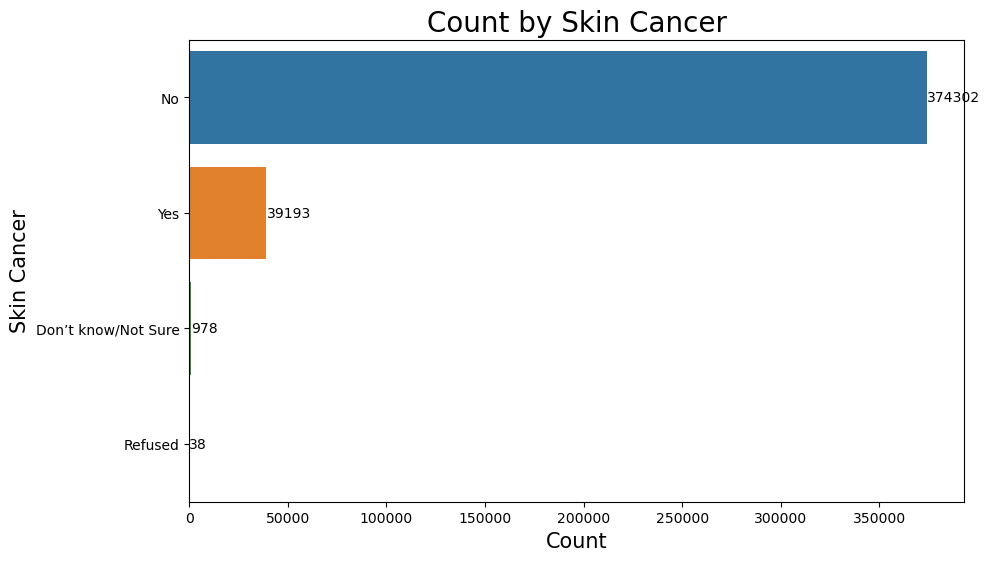

In [29]:
cat_count_eda('chcscncr')

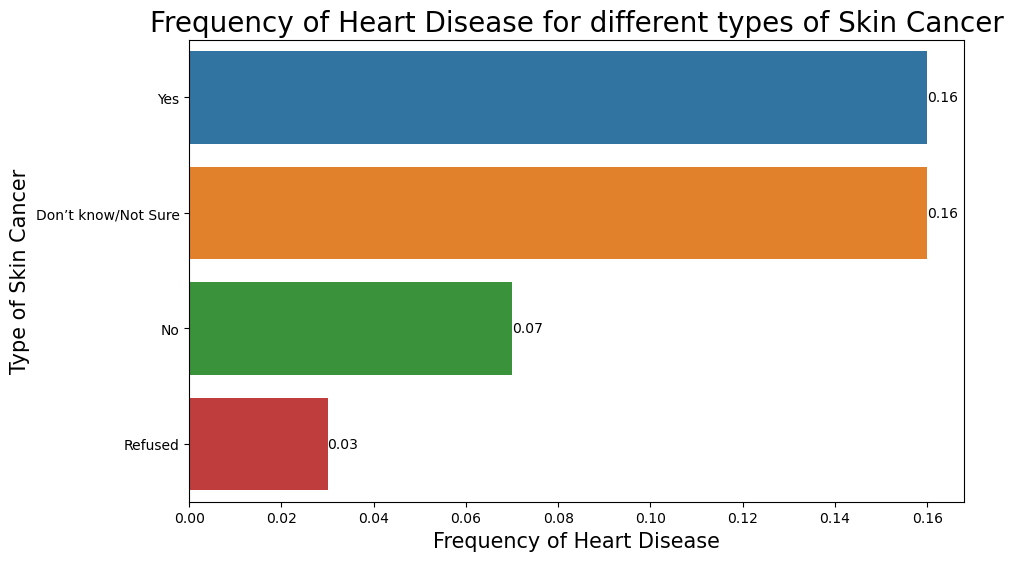

In [30]:
cat_disease_frequency('chcscncr')

It looks like no relationship between heart disease and skin cancer.

### chcocncr: Other Cancer

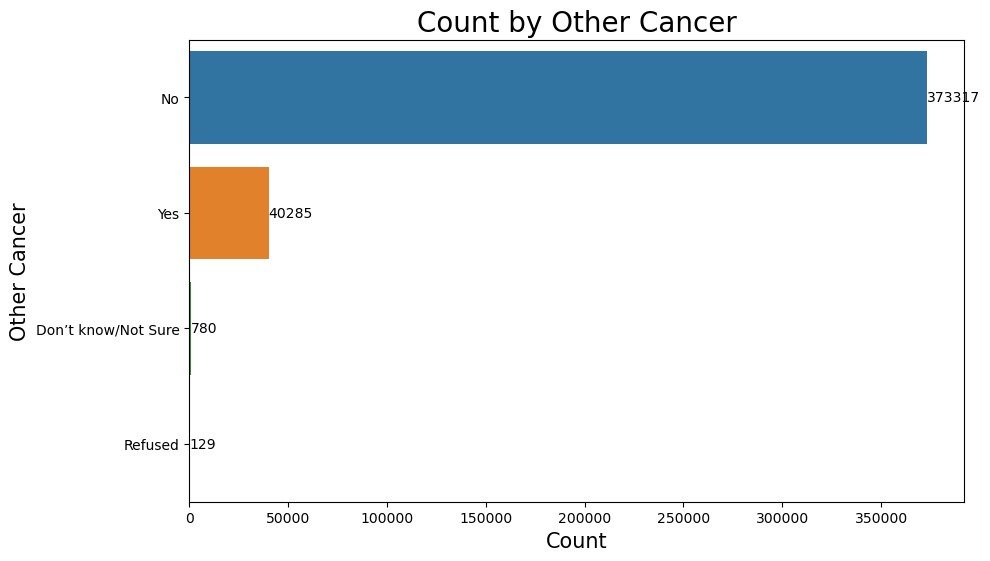

In [31]:
cat_count_eda('chcocncr')

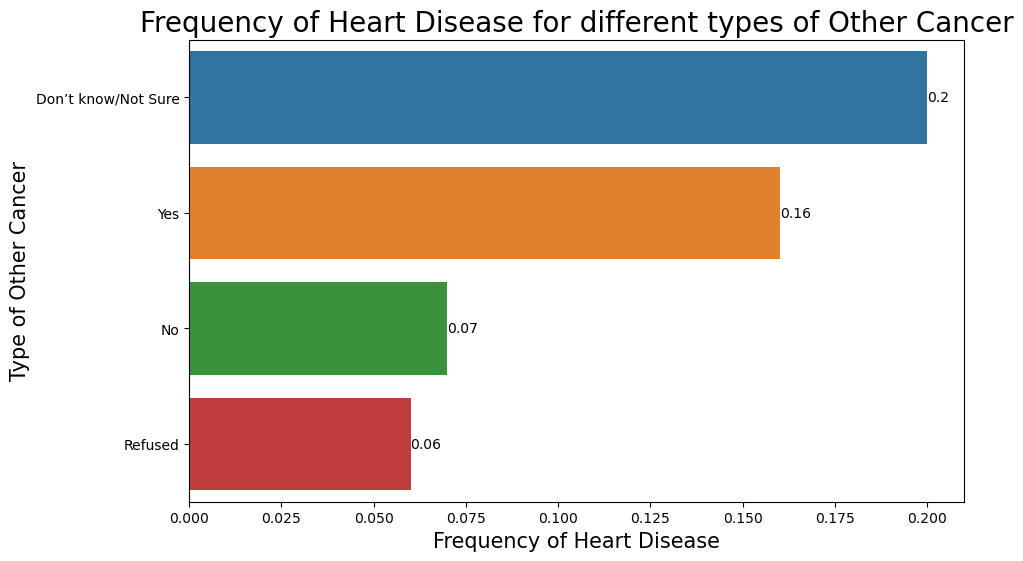

In [32]:
cat_disease_frequency('chcocncr')

It suggests a potential relationship between other cancer and the prevalence of heart disease, with heart disease being more common among individuals who currently has other cancer.

## Numerical Varaibles

In [33]:
df_ran.describe()

,physhlth,menthlth,Heart_Disease
count,406020.000000,407427.000000,414511.000000
mean,3.776366,4.106490,0.082159
std,8.322599,8.148143,0.274608
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,4.000000,0.000000
max,30.000000,30.000000,1.000000


The features 'physhlth' and 'menthlth' are both well-behaved, with no outliers or unexpected values to note. The range for both these features spans from 0 to 30.

In [34]:
num_col = [k for k in num_columns_description.keys()]

### physhlth: Number of Days Physical Health Not Good

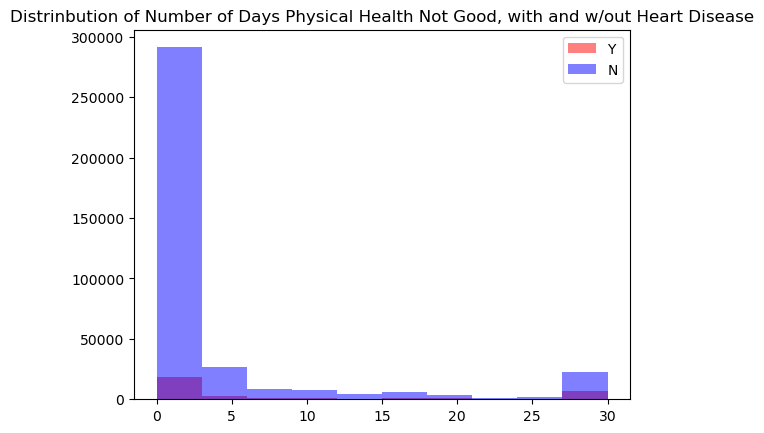

In [35]:
heart_disease = df_ran[df_ran['_michd'] == 'Yes']
no_heart_disease = df_ran[df_ran['_michd'] == 'No']

plt.hist(heart_disease['physhlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['physhlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Number of Days Physical Health Not Good, with and w/out Heart Disease');

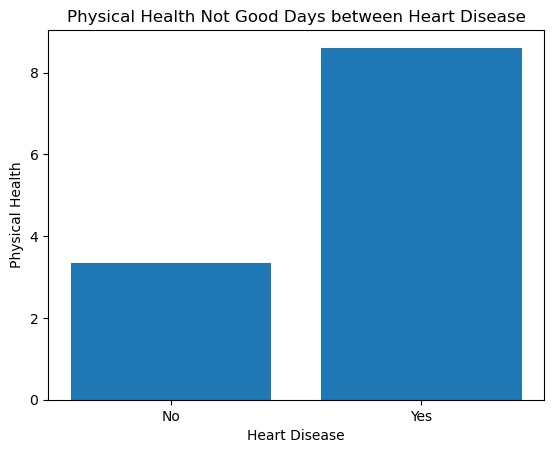

In [36]:
df_rate = df.groupby('_michd').agg({'physhlth': 'mean'})
plt.bar(df_rate.index, df_rate['physhlth'])
plt.title('Physical Health Not Good Days between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Physical Health');

It suggests a potential relationship between Number of Days Physical Health not good and the prevalence of heart disease, with heart disease being more common among individuals who has more days feeling bad physically.

### menthlth: Number of Days Mental Health Not Good

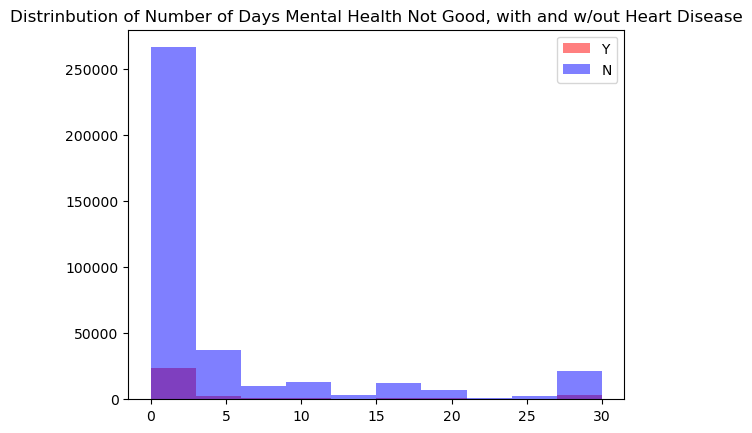

In [37]:
heart_disease = df_ran[df_ran['_michd'] == 'Yes']
no_heart_disease = df_ran[df_ran['_michd'] == 'No']

plt.hist(heart_disease['menthlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['menthlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Number of Days Mental Health Not Good, with and w/out Heart Disease');

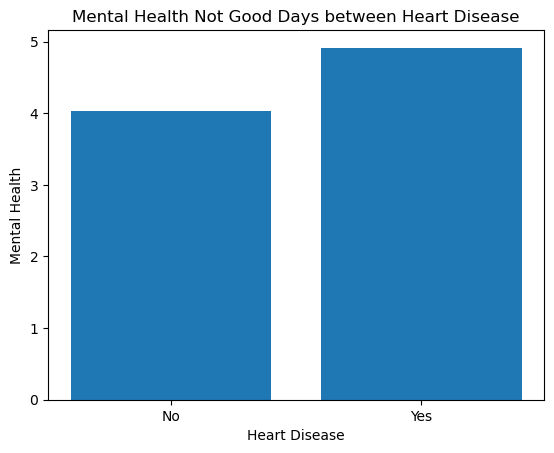

In [38]:
df_rate = df.groupby('_michd').agg({'menthlth': 'mean'})
plt.bar(df_rate.index, df_rate['menthlth'])
plt.title('Mental Health Not Good Days between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health');

It suggests a potential relationship between Number of Days Mental Health not good and the prevalence of heart disease, with heart disease being more common among individuals who has more days feeling bad mentally.

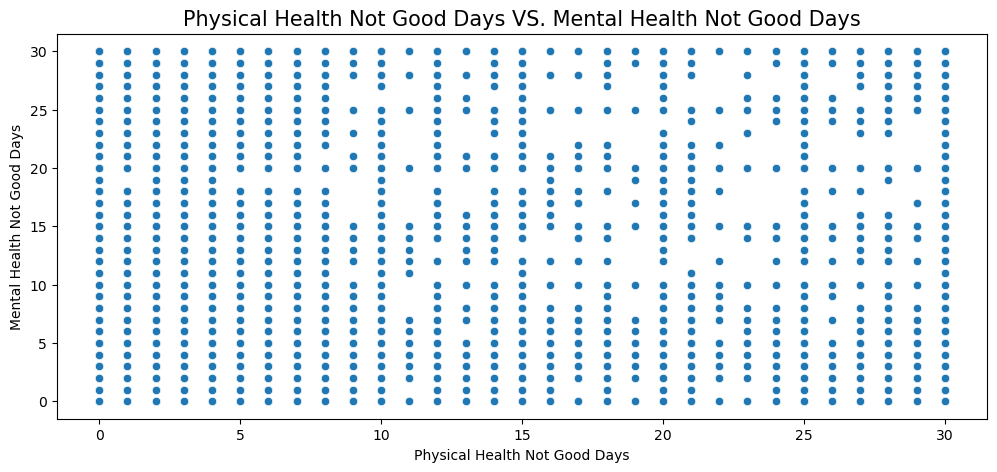

In [39]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'physhlth', y = 'menthlth', data = df_ran)
plt.title('Physical Health Not Good Days VS. Mental Health Not Good Days', size = 15)
plt.xlabel('Physical Health Not Good Days', size = 10)
plt.ylabel('Mental Health Not Good Days', size = 10);

There is no relationship between days of mental health not good and days of physical health not good.

# Mark's EDA

In [40]:
#Marks Columns of study
columns_mark = ['_michd','chccopd3', 'chckdny2', 'diabete4', '_drdxar3', 'marital', 'children',
       '_incomg1', 'employ1', 'htm4', 'wtkg3', '_bmi5', 'decide', 'diffwalk',
       'diffdres', '_state']

#Marks DataFrame
df_mark = df[columns_mark]

df_mark.head()

,_michd,chccopd3,chckdny2,diabete4,_drdxar3,marital,children,_incomg1,employ1,htm4,wtkg3,_bmi5,decide,diffwalk,diffdres,_state
0,No,yes,no,no,yes,married,0.0,25k_35k,retired,150.0,3266.0,1454.0,no,no,no,Alabama
1,Yes,no,yes,yes,yes,refused,0.0,unknown,unable_to_work,168.0,NaN,NaN,yes,yes,no,Alabama
2,Yes,no,no,yes,no,widowed,0.0,15k_25k,retired,165.0,7711.0,2829.0,no,no,no,Alabama
3,No,no,no,yes,no,married,0.0,50k_100k,retired,163.0,8845.0,3347.0,no,no,no,Alabama
4,Yes,no,no,yes,no,married,0.0,15k_25k,unable_to_work,180.0,9344.0,2873.0,no,yes,no,Alabama


In [41]:
df_mark['_michd'] = df_mark['_michd'].map(lambda x: 1 if x == 'Yes' else 0)

/var/folders/2s/0cx_vgq111qdb9jklnsjxt5w0000gp/T/ipykernel_97143/3457649111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark['_michd'] = df_mark['_michd'].map(lambda x: 1 if x == 'Yes' else 0)


In [42]:
def get_yes_proportion(column, n = 10):
    df_grouped = df_mark.groupby(column)['_michd'].mean().reset_index()
    df_grouped.rename(columns = {'_michd': '_michd%'},inplace = True)
    df_grouped.sort_values('_michd%', inplace=True)
    df_grouped = df_grouped.head(n)
    plt.scatter(df_grouped[column],df_grouped['_michd%'])
    plt.xticks(rotation = 45)
    plt.ylim(0,.3)

### Marital Status

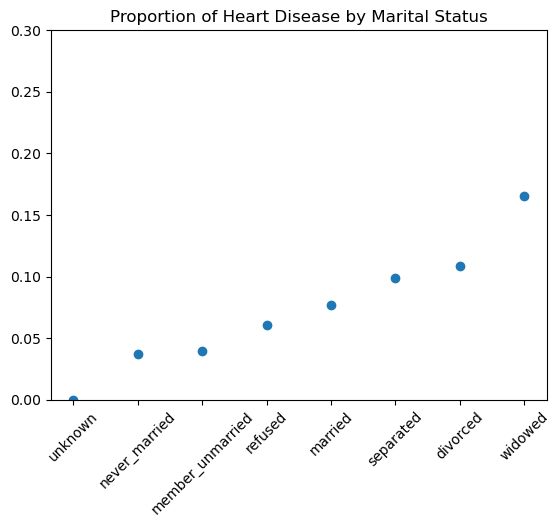

In [43]:
get_yes_proportion('marital')
plt.title('Proportion of Heart Disease by Marital Status');

Being widowed, divorced, or seperated is correlated with a higher chance of heart disease.

Unknown,Never married, or unmarried have the lowest correlations with heart disease.

### Employment Status

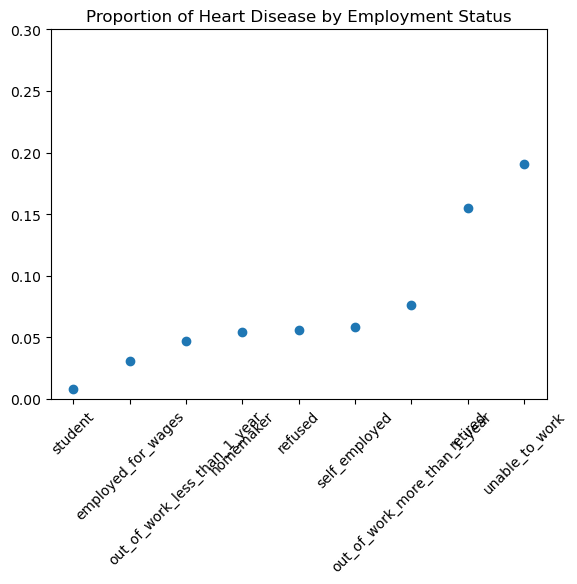

In [44]:
get_yes_proportion('employ1')
plt.title('Proportion of Heart Disease by Employment Status');

The unable to work and retired groups have a higher correlation with the target variable. This indicates that the higher the age, the higher the percentage chance of heart disease.

### COPD/emphysema/chronic bronchitis status

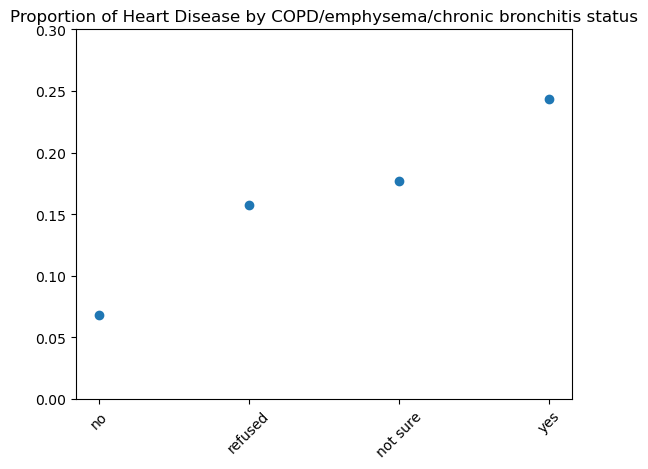

In [45]:
get_yes_proportion('chccopd3')
plt.title('Proportion of Heart Disease by COPD/emphysema/chronic bronchitis status');

COPD (Chronic Obstructive Pulmonary Disease), emphysema, or chronic bronchitis is correlated with having heart disease.

### Income

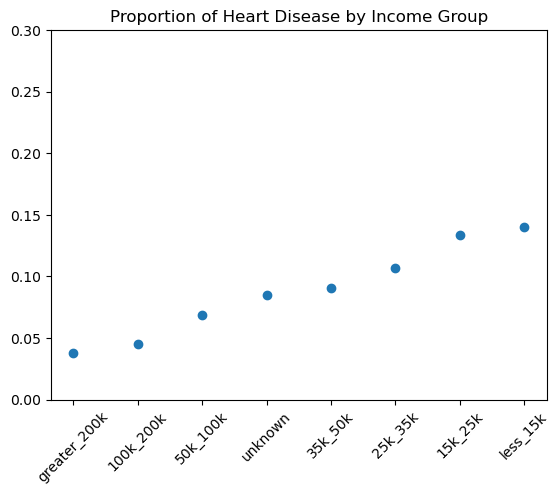

In [46]:
get_yes_proportion('_incomg1')
plt.title('Proportion of Heart Disease by Income Group');

### Kidney Disease

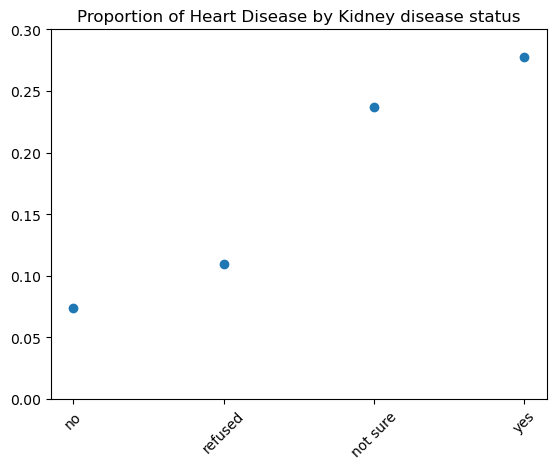

In [47]:
get_yes_proportion('chckdny2')
plt.title('Proportion of Heart Disease by Kidney disease status');

Kidney Disease is correlated with having heart disease

### Diabetes

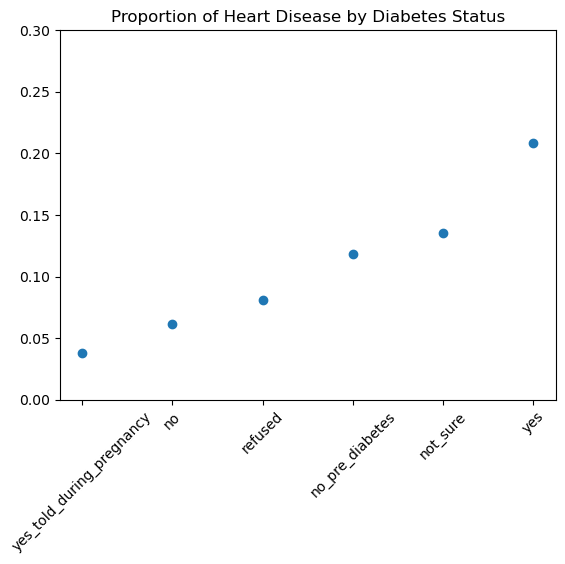

In [48]:
get_yes_proportion('diabete4')
plt.title('Proportion of Heart Disease by Diabetes Status');

Again, yes is correlated with having heart disease. Interestingly, the answer 'not sure' has had a higher proportion of heart disease than 'refused' for the past 3 graphs. 

yes_told_during_pregnancy has a very low correlation with heart disease

### Arthritus

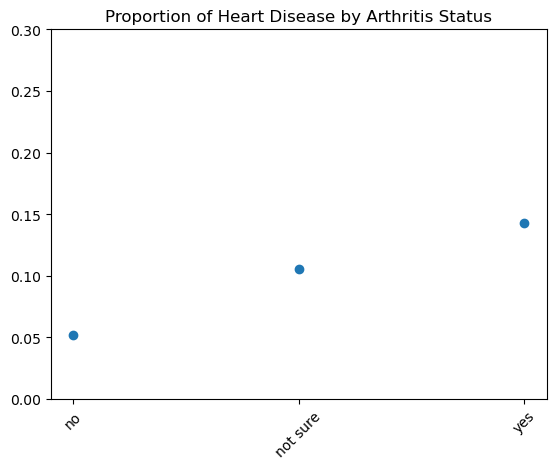

In [49]:
get_yes_proportion('_drdxar3')
plt.title('Proportion of Heart Disease by Arthritis Status');

Again, being told that you have arthritis is correlated with Heart Disease

### Difficulty Concentrating, remembering, or making deicisions

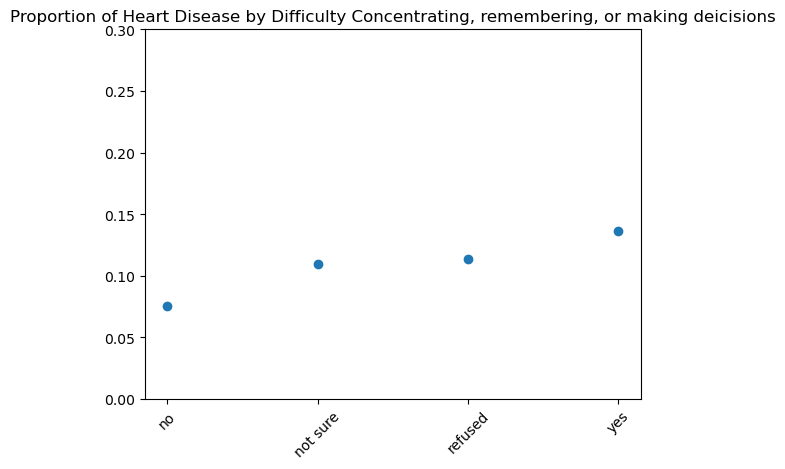

In [50]:
get_yes_proportion('decide')
plt.title('Proportion of Heart Disease by Difficulty Concentrating, remembering, or making deicisions');

### States

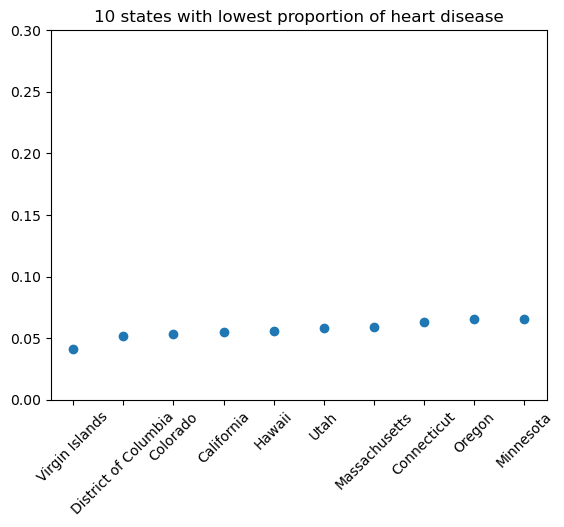

In [51]:
get_yes_proportion('_state')
plt.title('10 states with lowest proportion of heart disease');

Modifying this code to see the highest 10 states

In [52]:
def get_yes_proportion_highest(column, n = 10):
    df_grouped = df_mark.groupby(column)['_michd'].mean().reset_index()
    df_grouped.rename(columns = {'_michd': '_michd%'},inplace = True)
    df_grouped.sort_values('_michd%', inplace=True)
    df_grouped = df_grouped.tail(n)
    plt.scatter(df_grouped[column],df_grouped['_michd%'])
    plt.xticks(rotation = 45)
    plt.ylim(0,.3)

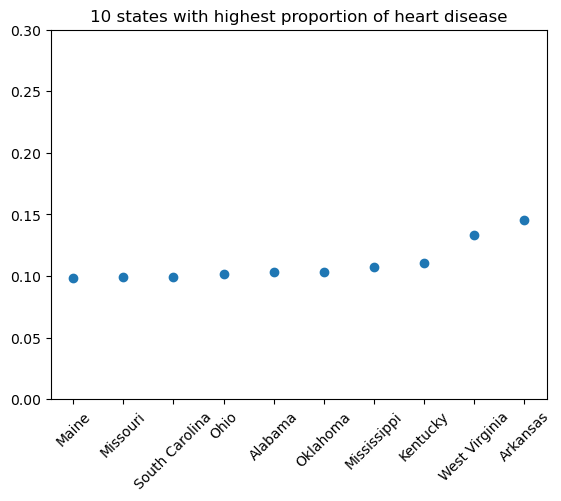

In [53]:
get_yes_proportion_highest('_state')
plt.title('10 states with highest proportion of heart disease');

### Difficulty Walking

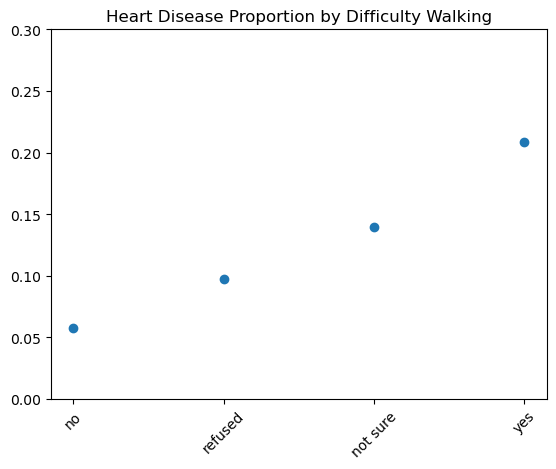

In [54]:
get_yes_proportion('diffwalk')
plt.title('Heart Disease Proportion by Difficulty Walking');

Difficulty Walking is correlated with having heart disease

### Difficulty Dressing

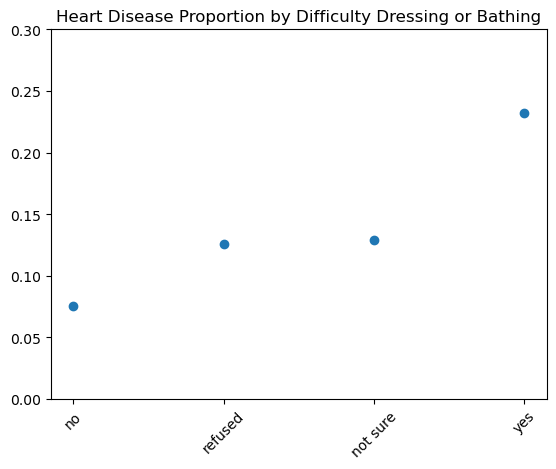

In [55]:
get_yes_proportion('diffdres')
plt.title('Heart Disease Proportion by Difficulty Dressing or Bathing');

Difficulty Dressing or Bathing is correlated with having heart disease

### Number of Children

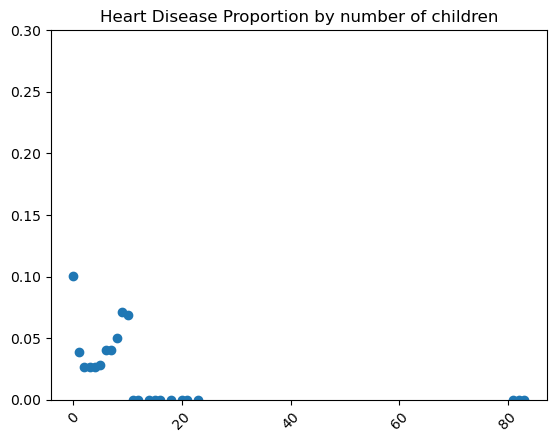

In [56]:
get_yes_proportion('children',n = 50)
plt.title('Heart Disease Proportion by number of children');

This graph is meaningless

### BMI

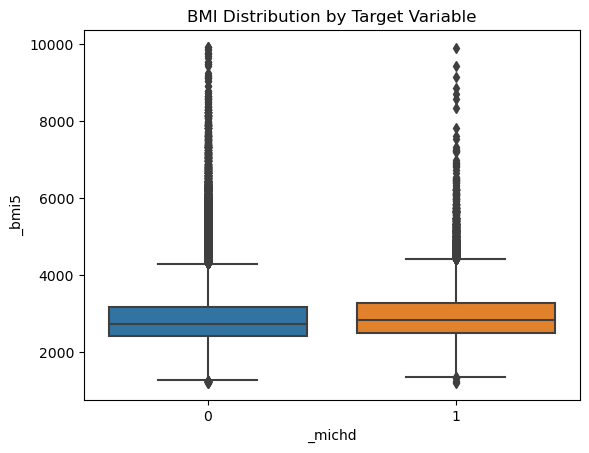

In [57]:
sns.boxplot(x='_michd', y='_bmi5', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

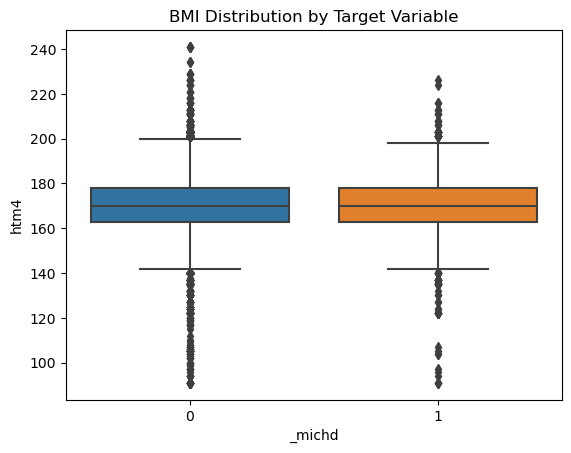

In [58]:
sns.boxplot(x='_michd', y='htm4', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

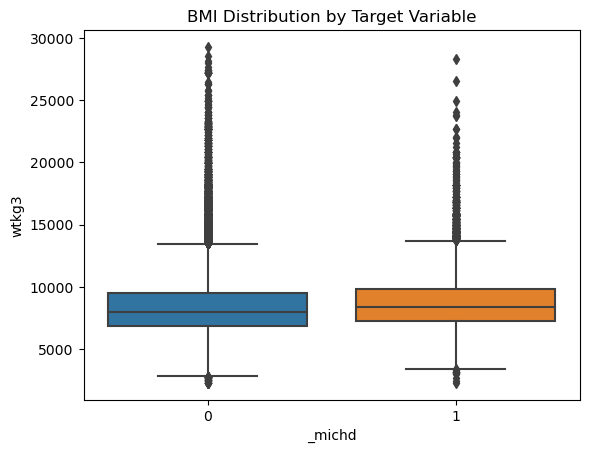

In [59]:
sns.boxplot(x='_michd', y='wtkg3', data=df_mark)
plt.title('BMI Distribution by Target Variable')
plt.show()

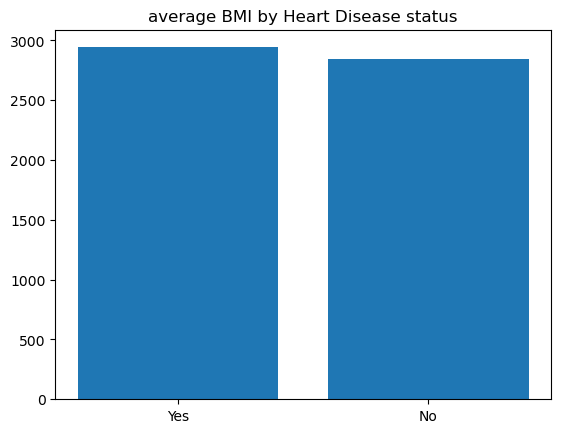

In [60]:
average_yes = df_mark[df_mark['_michd'] == 1]['_bmi5'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['_bmi5'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average BMI by Heart Disease status');

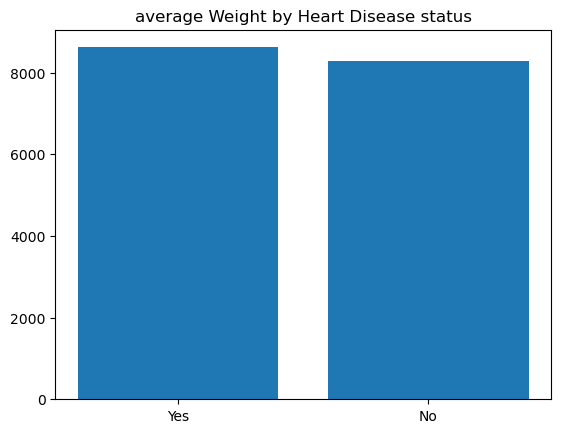

In [61]:
average_yes = df_mark[df_mark['_michd'] == 1]['wtkg3'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['wtkg3'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average Weight by Heart Disease status');

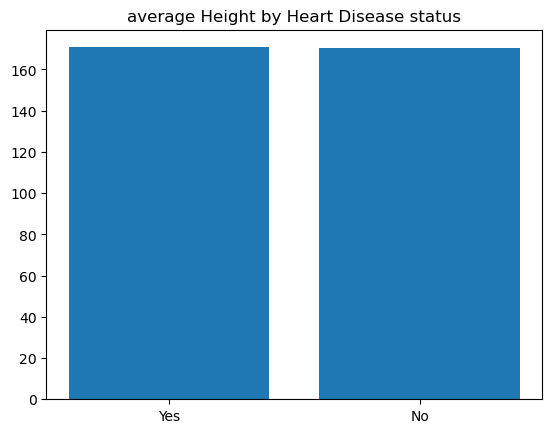

In [62]:
average_yes = df_mark[df_mark['_michd'] == 1]['htm4'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['htm4'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('average Height by Heart Disease status');

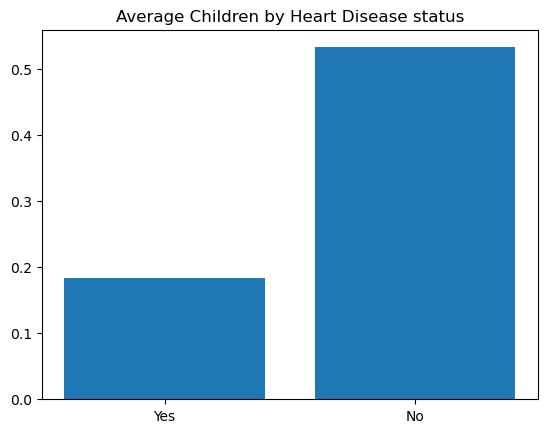

In [63]:
average_yes = df_mark[df_mark['_michd'] == 1]['children'].mean()
average_no = df_mark[df_mark['_michd'] == 0]['children'].mean()
plt.bar(['Yes', 'No'], [average_yes, average_no])
plt.title('Average Children by Heart Disease status');

# Lucas' EDA

In [64]:
#Add target variable to the dataframe of interest
df['_michd'] = df['_michd'].map({'No' : 0, 'Yes': 1})

## Categorical Variables

### SMOKER3
Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker

In [65]:
#Count for each type of smoker
df['_smoker3'].value_counts()

never smoked      244013
former smoker     111829
everday smoker     38387
someday smoker     14711
missing             5571
Name: _smoker3, dtype: int64

In [66]:
#Frequency of Heart Disease for each type of smoker (percent)
pd.DataFrame(df.groupby('_smoker3')['_michd'].mean() * 100)

,_michd
_smoker3,
everday smoker,10.714565
former smoker,12.552200
missing,8.418596
never smoked,5.762808
someday smoker,9.346747


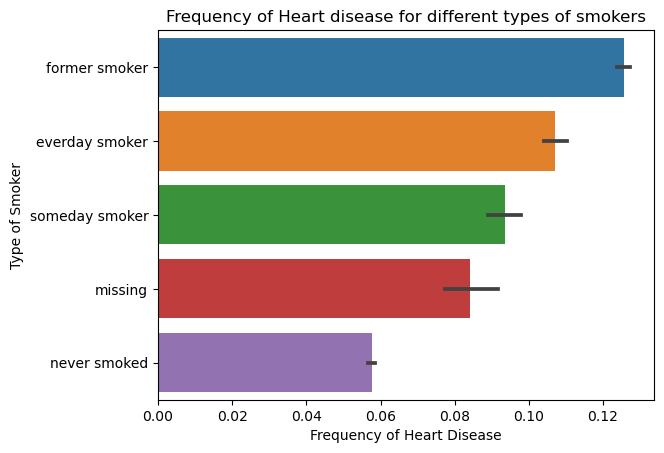

In [67]:
#order of smoker types in plot to make it look better
order = ['former smoker', 'everday smoker', 'someday smoker', 'missing', 'never smoked']

#plot
sns.barplot(data = df, y = '_smoker3',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of smokers')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of Smoker');

Significant differences in heart disease rates for different smoker groups, will be a good feature for models.

### USENOW3
Frequency of using chewing tobacco

In [68]:
#Count for each type of tobacco chewer
df['usenow3'].value_counts()

no           398041
every day      7671
some days      5393
missing        2715
refused         506
not sure        185
Name: usenow3, dtype: int64

In [69]:
#Frequency of Heart Disease for each type of tobacco chewer (percent)
pd.DataFrame(df.groupby('usenow3')['_michd'].mean() * 100)

,_michd
usenow3,
every day,9.112241
missing,8.066298
no,8.212219
not sure,10.810811
refused,7.509881
some days,7.268682


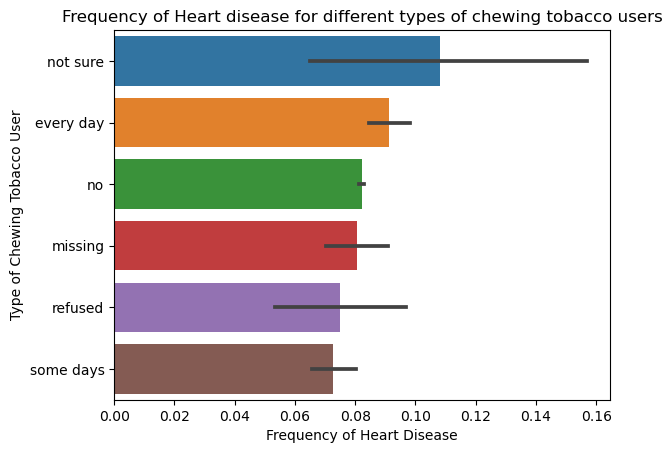

In [70]:
#order of smoker types in plot to make it look better
order = ['not sure', 'every day', 'no', 'missing', 'refused', 'some days']

#plot
sns.barplot(data = df, y = 'usenow3',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of chewing tobacco users')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of Chewing Tobacco User');

Not significant differences between different groups, will not be a good predictor.

### ECIGNOW1
Do you now use e-cigarettes, every day, some days, or not at all?

In [71]:
#Count for each type of e-cig users
df['ecignow1'].value_counts()

no          307990
never        82978
somedays     10182
everyday      8977
missing       3648
refused        497
not sure       239
Name: ecignow1, dtype: int64

In [72]:
#Frequency of Heart Disease for each type of e-cig chewer (percent)
pd.DataFrame(df.groupby('ecignow1')['_michd'].mean() * 100)

,_michd
ecignow1,
everyday,4.489250
missing,7.867325
never,8.044301
no,8.471054
not sure,12.552301
refused,7.042254
somedays,5.264192


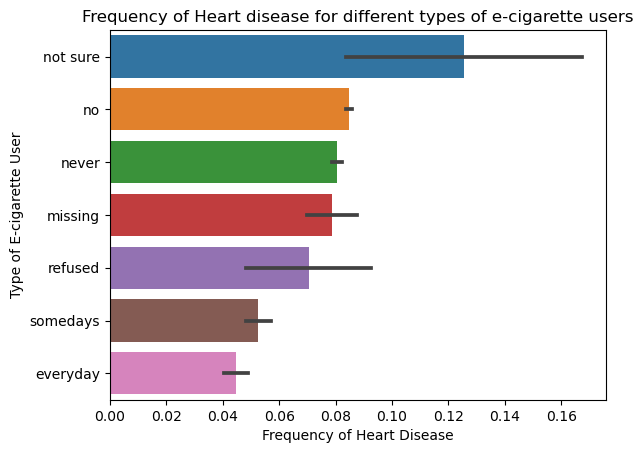

In [73]:
#order of plot to make it look better
order = ['not sure', 'no', 'never', 'missing', 'refused', 'somedays', 'everyday']

#plot
sns.barplot(data = df, y = 'ecignow1',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different types of e-cigarette users')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Type of E-cigarette User');

Interesting that those who say not sure had the highest percentage of heart disease. This could be due to the small amount of people that were unsure. Also, every day users of e-cigs had the lowest, I wonder if this is because it is correlated with age; more young people use e-cigarettes.

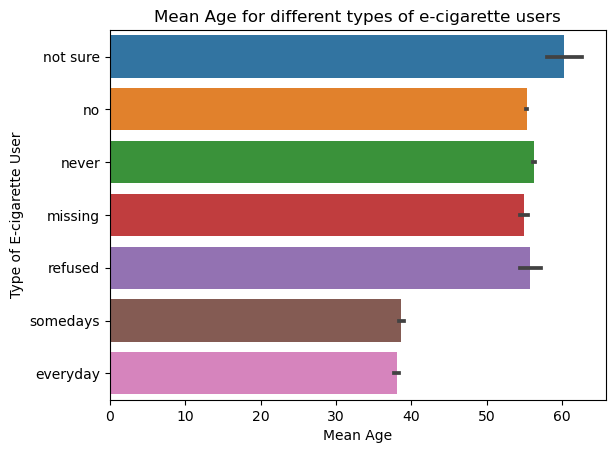

In [74]:
#order of plot to make it look better
order = ['not sure', 'no', 'never', 'missing', 'refused', 'somedays', 'everyday']

#plot
sns.barplot(data = df, y = 'ecignow1',  x = '_age80', orient = 'h', order = order)
plt.title('Mean Age for different types of e-cigarette users')
plt.xlabel('Mean Age')
plt.ylabel('Type of E-cigarette User');

As guessed above, every day e-cig users are younger. This may be why they have less frequency of heart disease.

### _METSTAT
Metropolitan Status

In [75]:
#Count for those who are in a metro area and those who are not
df['_metstat'].value_counts()

yes        283103
no         124596
missing      6812
Name: _metstat, dtype: int64

In [76]:
#Frequency of Heart Disease for people in metro are and those not(percent)
pd.DataFrame(df.groupby('_metstat')['_michd'].mean() * 100)

,_michd
_metstat,
missing,7.486788
no,9.786028
yes,7.542485


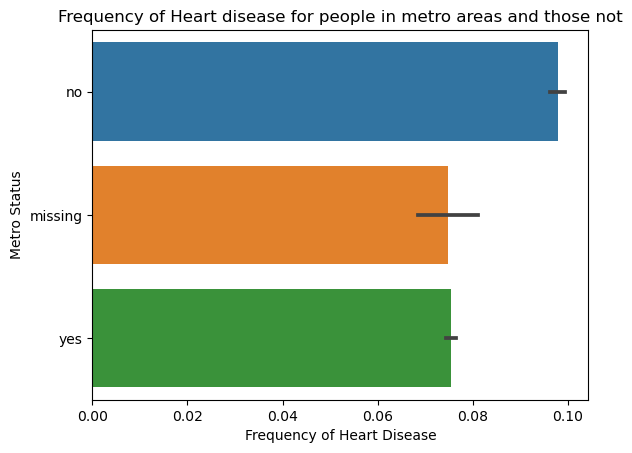

In [77]:
#order of plot to make it look better
order = ['no', 'missing', 'yes']

#plot
sns.barplot(data = df, y = '_metstat',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for people in metro areas and those not')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Metro Status');

People in a metro are have lower frequency of heart disease, could be a good predictor in our models.

### _IMPRACE
Imputed race/ethnicity value (If no response, imputed with most common race for that region)

In [78]:
#Count for different races
df['_imprace'].value_counts()

white              315667
hispanic            36145
black               30488
other race          14654
asian               10630
native american      6927
Name: _imprace, dtype: int64

In [79]:
#Frequency of Heart Disease for different races (percent)
pd.DataFrame(df.groupby('_imprace')['_michd'].mean() * 100)

,_michd
_imprace,
asian,3.142051
black,7.311073
hispanic,5.018675
native american,10.177566
other race,8.543742
white,8.782039


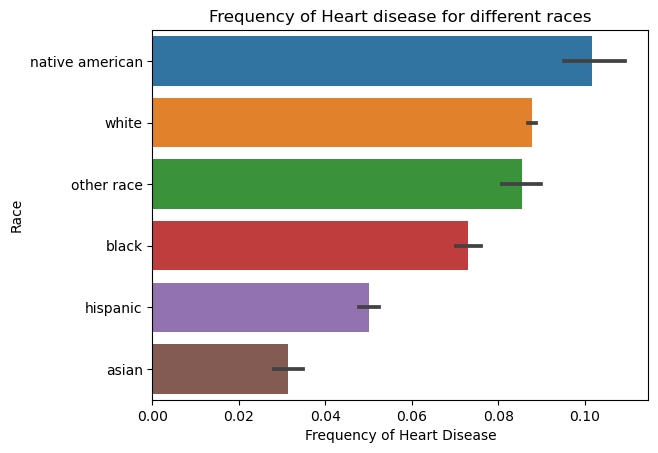

In [80]:
#order
order = ['native american', 'white', 'other race', 'black', 'hispanic', 'asian']

#plot
sns.barplot(data = df, y = '_imprace',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different races')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Race');

People who are asian have very low frequency of heart disease. Native americans have the highest. This will be a good feature in the model for prediction.

### _EDUCAG
Level of education completed

In [81]:
#Count
df['_educag'].value_counts()

graduated college    170496
attended college     114027
highschool           104345
no highschool         23877
missing                1766
Name: _educag, dtype: int64

In [82]:
#Frequency of Heart Disease for different education levels (percent)
pd.DataFrame(df.groupby('_educag')['_michd'].mean() * 100)

,_michd
_educag,
attended college,8.719865
graduated college,6.211876
highschool,9.847142
missing,7.361268
no highschool,13.054404


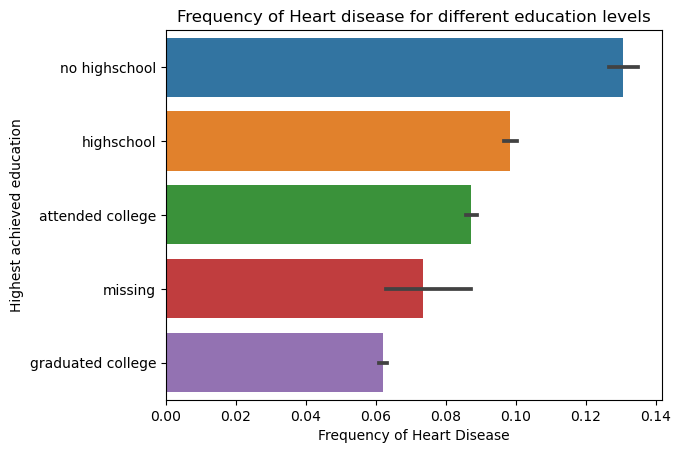

In [83]:
#order of smoker types in plot to make it look better
order = ['no highschool', 'highschool', 'attended college','missing', 'graduated college']

#plot
sns.barplot(data = df, y = '_educag',  x = '_michd', orient = 'h', order = order)
plt.title('Frequency of Heart disease for different education levels')
plt.xlabel('Frequency of Heart Disease')
plt.ylabel('Highest achieved education');

## Numercal Variables

In [84]:
def n_intake_groups(n,x, high, low):
    size_of_group = (high - low) / n #Size of each group
    for i in range(1,n+1):
        if x <= low + i * size_of_group:
            return f'between {int(low + (i-1) * size_of_group)} and {int(low + i * size_of_group)}'

def plot_groups(n, dataframe, column_name, plot_column_name):
    high = max(dataframe[column_name])
    low = min(dataframe[column_name])

    order = [f'between {int(high - ((high-low) / n )* (i+1))} and {int(high - ((high-low) / n )* (i))}' for i in range(n)]

    sns.barplot(y = dataframe[column_name].map(lambda x: n_intake_groups(n,x, high, low)), x = dataframe['_michd'], orient = 'h', order = order)
    plt.title(f'Frequency of Heart disease for {n} different {plot_column_name} groups')
    plt.xlabel('Frequency of Heart Disease')
    plt.ylabel(f'{plot_column_name} groups');
    plt.show()

### _DRNKWK1
Calculated total number of alcoholic beverages consumed per week.

In [85]:
#quick stats
df['_drnkwk1'].describe().round()

count    399386.0
mean        287.0
std         898.0
min           0.0
25%           0.0
50%          23.0
75%         233.0
max       53200.0
Name: _drnkwk1, dtype: float64

In [86]:
#Those diagnosed with heart disease drink less on average
df.groupby('_michd')['_drnkwk1'].mean()

_michd
0    292.398831
1    223.998543
Name: _drnkwk1, dtype: float64

Text(0.5, 1.0, 'The median is 23 drinks per week so this box plot is hard to look at')

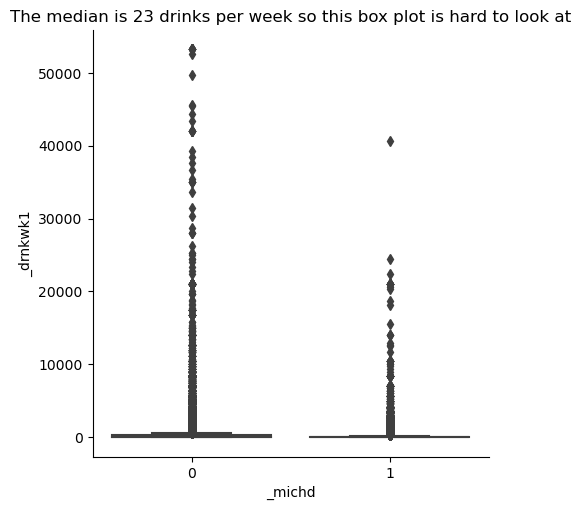

In [87]:
sns.catplot(data= df, y = '_drnkwk1', x = "_michd", kind="box")
plt.title('The median is 23 drinks per week so this box plot is hard to look at')

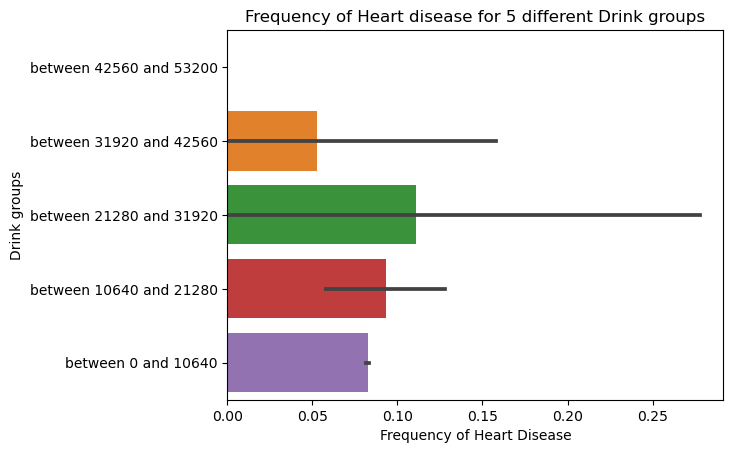

In [88]:
plot_groups(5, df, '_drnkwk1', 'Drink')

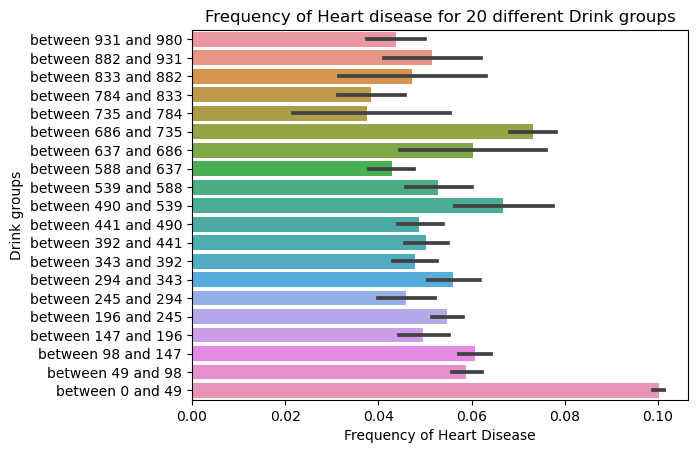

In [89]:
plot_groups(20, df[df['_drnkwk1'] < 1_000], '_drnkwk1', 'Drink')

Drinking seems to be a mediocre feature. Surprisingly, heavy drinkers are less likely to be diagnosed with heart disease.

### _AGE80
Imputed Age value collapsed above 80

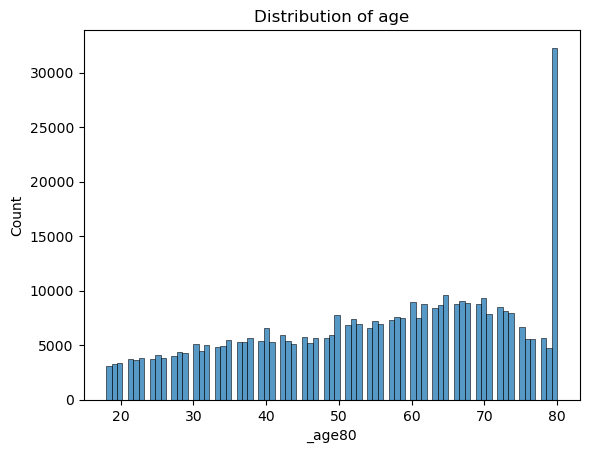

In [90]:
#quick stats
sns.histplot(df['_age80'])
plt.title('Distribution of age')
plt.show();

Fairly distributed but many values at 80 due to imputation.

In [91]:
#Those diagnosed with heart disease drink less on average
df.groupby('_michd')['_age80'].mean()

_michd
0    53.538471
1    67.944327
Name: _age80, dtype: float64

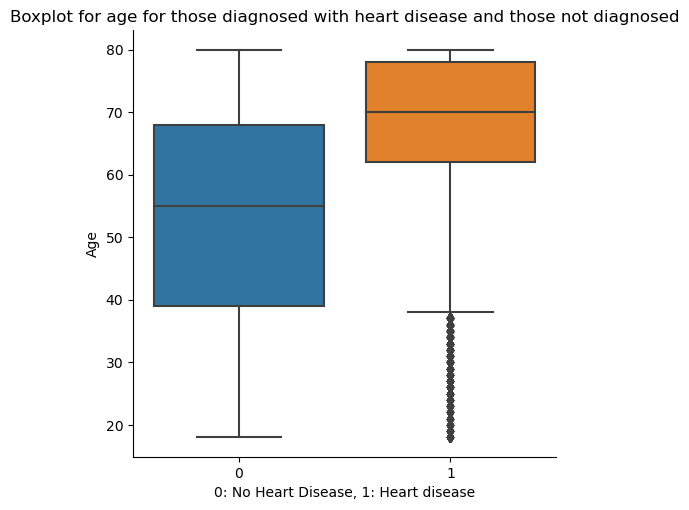

In [92]:
sns.catplot(data= df, y = '_age80', x = "_michd", kind="box")
plt.title('Boxplot for age for those diagnosed with heart disease and those not diagnosed')
plt.ylabel('Age')
plt.xlabel('0: No Heart Disease, 1: Heart disease')
plt.show();

Those diagnosed with heart disease tend to be older. Around 50% of peolpe with heart disease are in the age range of 65 to 80. Getting heart disease when you are young is rare.

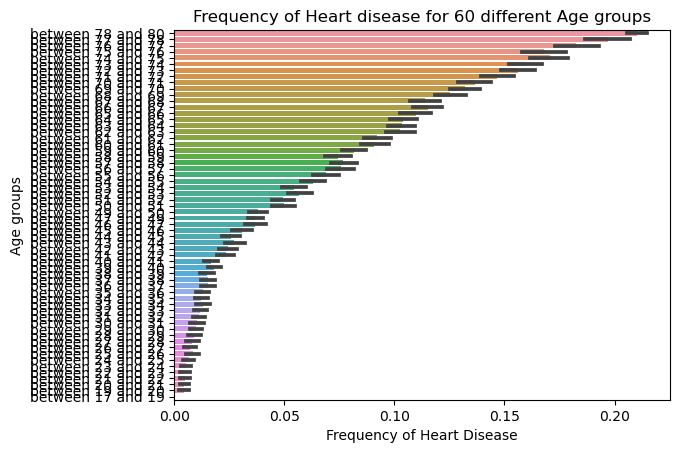

In [249]:
plot_groups(60, df, '_age80', 'Age')

In [94]:
df['age_squared'] = df['_age80'] ** 2

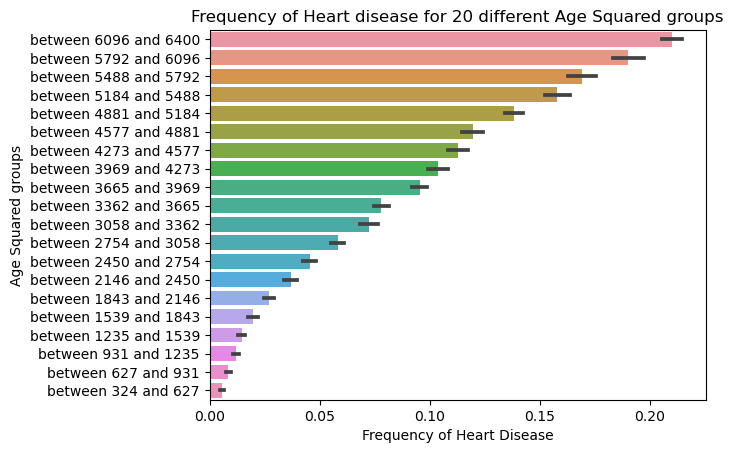

In [95]:
plot_groups(20, df, 'age_squared', 'Age Squared')

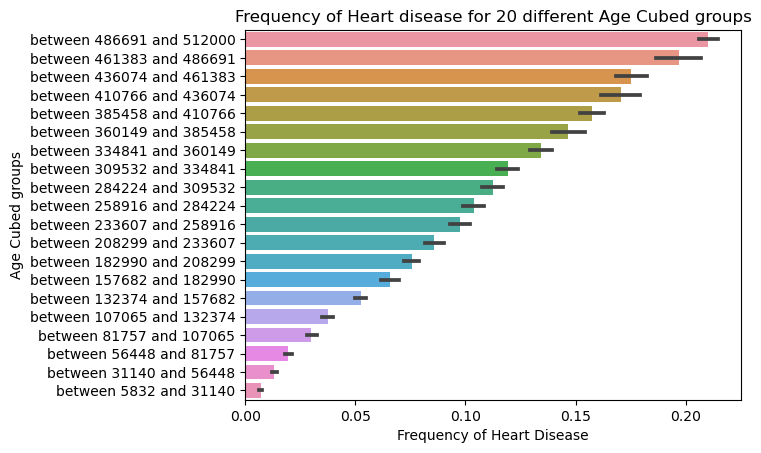

In [96]:
df['age_cubed'] = df['_age80'] ** 3
plot_groups(20, df, 'age_cubed', 'Age Cubed')

### FTJUDA2_
Computed Fruit Juice intake in times per day

In [97]:
#quick stats
df['ftjuda2_'].describe().round()

count    390439.0
mean         44.0
std         364.0
min           0.0
25%           0.0
50%           3.0
75%          33.0
max        9900.0
Name: ftjuda2_, dtype: float64

In [98]:
#Those diagnosed with heart disease drink less on average
df.groupby('_michd')['ftjuda2_'].mean()

_michd
0    43.820323
1    50.641421
Name: ftjuda2_, dtype: float64

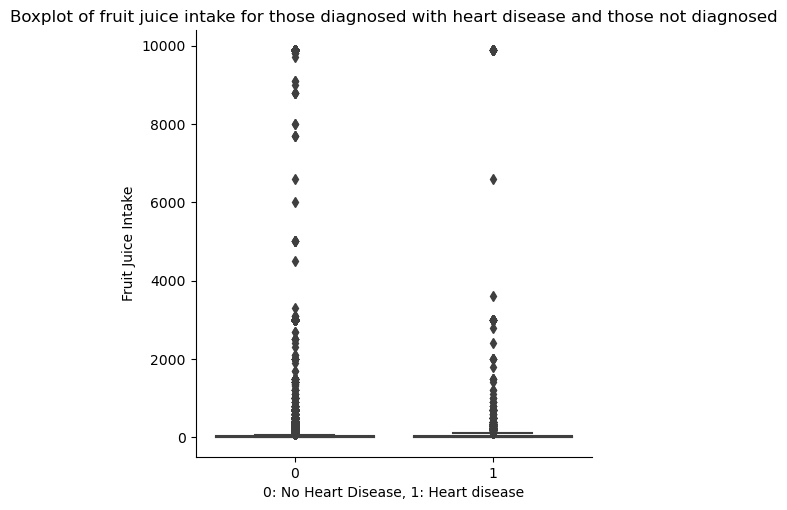

In [99]:
sns.catplot(data= df, y = 'ftjuda2_', x = "_michd", kind="box")
plt.title('Boxplot of fruit juice intake for those diagnosed with heart disease and those not diagnosed')
plt.ylabel('Fruit Juice Intake')
plt.xlabel('0: No Heart Disease, 1: Heart disease')
plt.show();

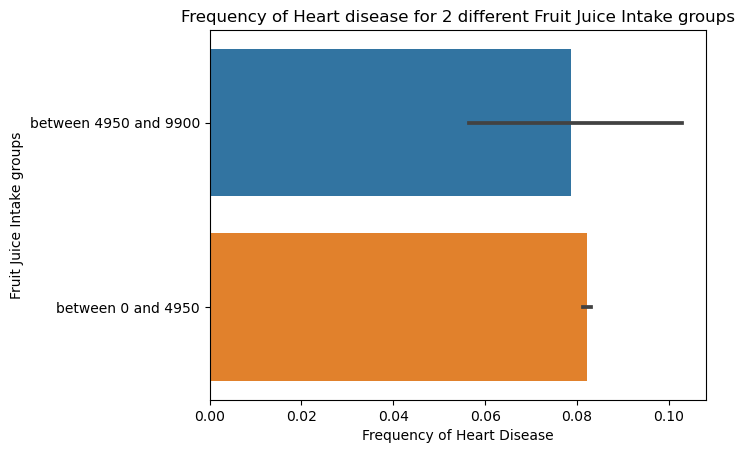

In [100]:
plot_groups(2, df, 'ftjuda2_', 'Fruit Juice Intake')

### FRUTDA2_
Computed Fruit intake in times per day

In [101]:
#quick stats
df['frutda2_'].describe().round()

count    390862.0
mean        134.0
std         499.0
min           0.0
25%          43.0
50%         100.0
75%         100.0
max        9900.0
Name: frutda2_, dtype: float64

In [102]:
df.groupby('_michd')['frutda2_'].mean()

_michd
0    134.645017
1    127.400405
Name: frutda2_, dtype: float64

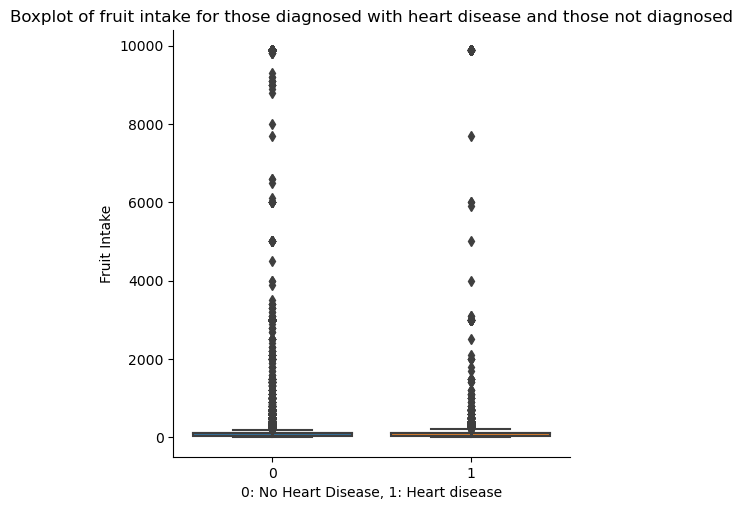

In [103]:
sns.catplot(data= df, y = 'frutda2_', x = "_michd", kind="box")
plt.title('Boxplot of fruit intake for those diagnosed with heart disease and those not diagnosed')
plt.ylabel('Fruit Intake')
plt.xlabel('0: No Heart Disease, 1: Heart disease')
plt.show();

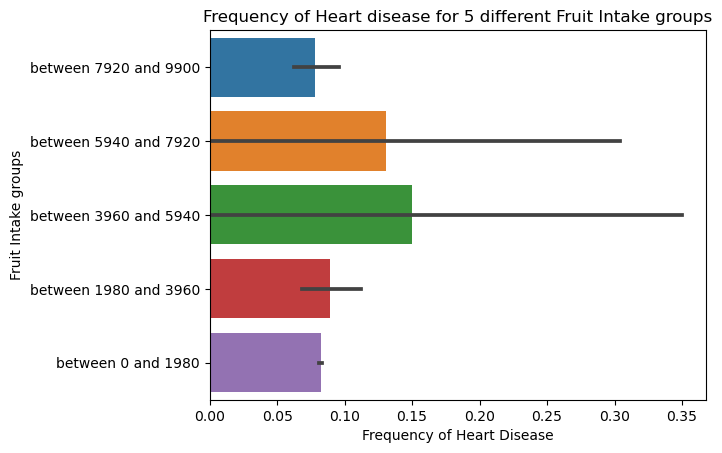

In [104]:
plot_groups(5, df, 'frutda2_', 'Fruit Intake')

### GRENDA1_
Computed Dark Green Vegetable intake in times per day


In [105]:
#quick stats
df['grenda1_'].describe().round()

count    390568.0
mean         79.0
std         464.0
min           0.0
25%          14.0
50%          43.0
75%          71.0
max        9900.0
Name: grenda1_, dtype: float64

In [106]:
df.groupby('_michd')['grenda1_'].mean()

_michd
0    79.383284
1    74.515017
Name: grenda1_, dtype: float64

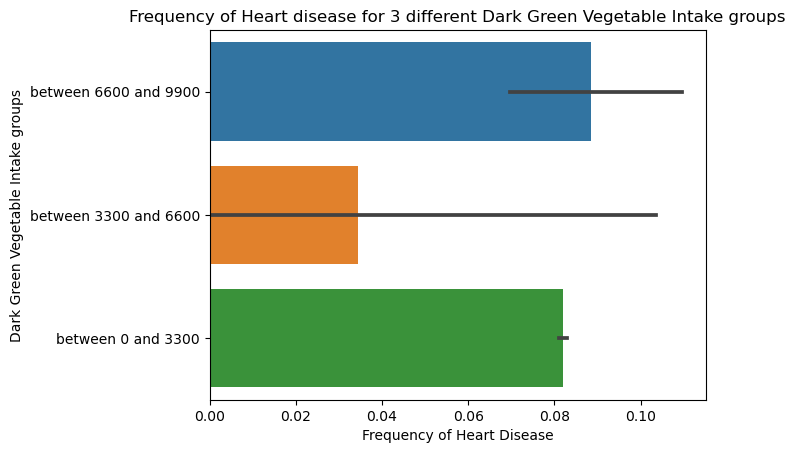

In [107]:
plot_groups(3, df, 'grenda1_', 'Dark Green Vegetable Intake')

### FRNCHDA_
Computed French Fry intake in times per day

In [108]:
#quick stats
df['frnchda_'].describe().round()

count    390040.0
mean         26.0
std         174.0
min           0.0
25%           3.0
50%          14.0
75%          29.0
max        9900.0
Name: frnchda_, dtype: float64

In [109]:
df.groupby('_michd')['frnchda_'].mean()

_michd
0    25.699415
1    25.688230
Name: frnchda_, dtype: float64

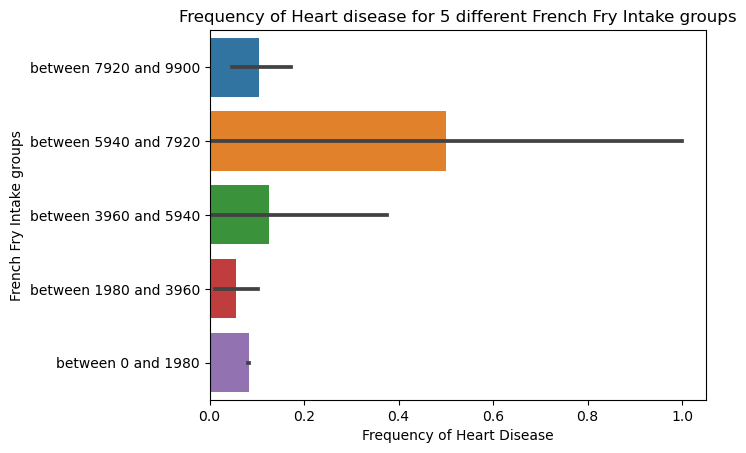

In [110]:
plot_groups(5, df, 'frnchda_', 'French Fry Intake')

### POTADA1_
Computed Potato Servings per day

In [111]:
#quick stats
df['potada1_'].describe().round()

count    386416.0
mean         28.0
std         178.0
min           0.0
25%           7.0
50%          14.0
75%          29.0
max        9900.0
Name: potada1_, dtype: float64

In [112]:
df.groupby('_michd')['potada1_'].mean()

_michd
0    27.751068
1    36.113848
Name: potada1_, dtype: float64

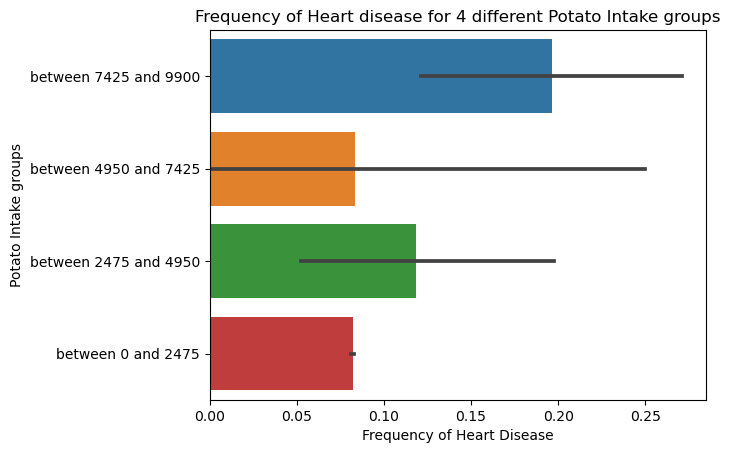

In [113]:
plot_groups(4, df, 'potada1_', 'Potato Intake')

### VEGEDA2_
Computed Other Vegetable intake in times per day

In [114]:
#quick stats
df['vegeda2_'].describe().round()

count    386361.0
mean        140.0
std         650.0
min           0.0
25%          43.0
50%         100.0
75%         100.0
max        9900.0
Name: vegeda2_, dtype: float64

In [115]:
df.groupby('_michd')['vegeda2_'].mean()

_michd
0    139.814475
1    137.319854
Name: vegeda2_, dtype: float64

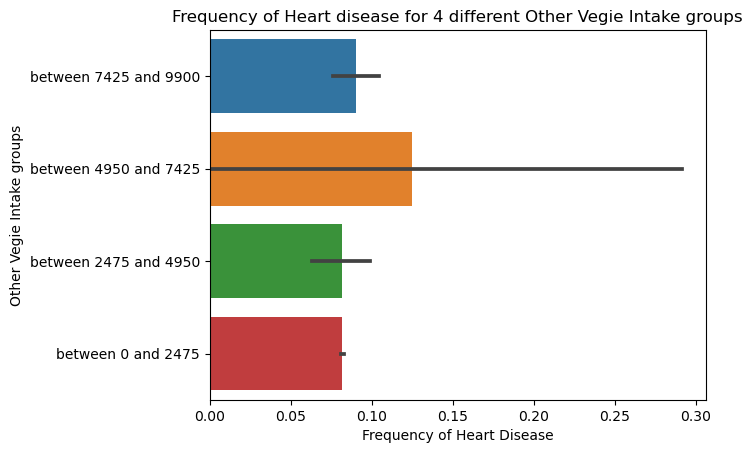

In [116]:
plot_groups(4, df, 'vegeda2_', 'Other Vegie Intake')

# Notable Graphs for the Presentation

In [117]:
df.head()

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,...,_age80,_educag,ftjuda2_,frutda2_,grenda1_,frnchda_,potada1_,vegeda2_,age_squared,age_cubed
0,0,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,...,70.0,highschool,5.397605e-79,100.0,5.700000e+01,4.300000e+01,14.0,100.0,4900.0,343000.0
1,1,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,...,67.0,graduated college,5.397605e-79,100.0,1.400000e+01,5.397605e-79,14.0,100.0,4489.0,300763.0
2,1,Female,Very good,0.0,0.0,No,Within past year (anytime < 12 months ago),No physical activity or exercise in last 30 days,Yes,No,...,72.0,highschool,5.397605e-79,100.0,5.397605e-79,1.400000e+01,14.0,43.0,5184.0,373248.0
3,0,Female,Very good,0.0,10.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,No,...,62.0,highschool,7.100000e+01,43.0,1.000000e+01,5.700000e+01,27.0,71.0,3844.0,238328.0
4,1,Male,Poor,30.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,No,Yes,...,76.0,no highschool,5.397605e-79,100.0,1.000000e+02,2.900000e+01,29.0,100.0,5776.0,438976.0


## Imbalanced Data

In [165]:
#Frequency 
df['_michd'].value_counts(normalize = True)

0    0.917841
1    0.082159
Name: _michd, dtype: float64

In [239]:
colors = sns.color_palette("hls", 8)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

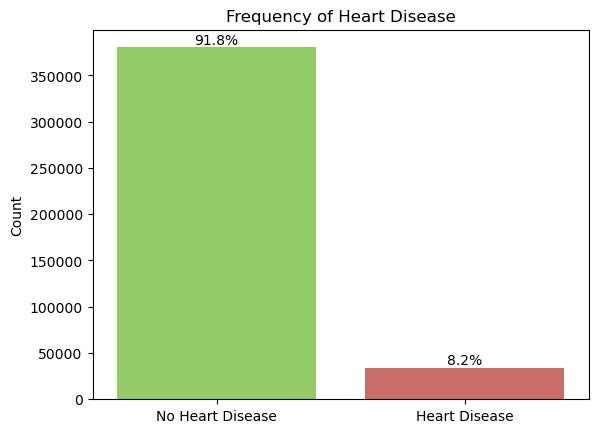

In [393]:
#plot
fig = sns.countplot(data = df, x = '_michd', palette = [colors[2], colors[0]])
fig.set_xticklabels(['No Heart Disease', 'Heart Disease'])
fig.bar_label(fig.containers[0], labels = ['91.8%','8.2%'])
plt.title('Frequency of Heart Disease')
plt.xlabel('')
plt.ylabel('Count')

plt.savefig(f'../graph/Imbalanced.png');

## Sex

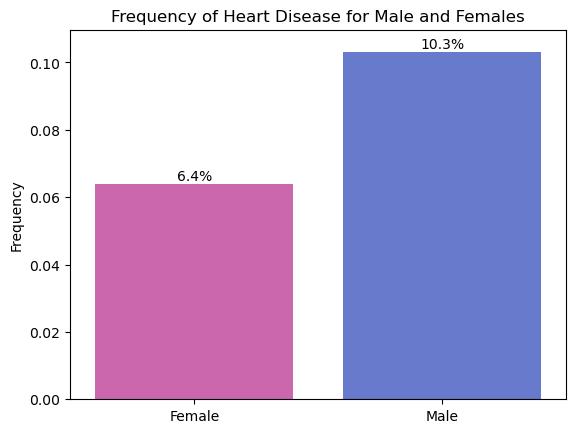

In [395]:
#plot
fig = sns.barplot(data = df, x = '_sex', y = '_michd', errwidth = 0, palette = [colors[7], colors[5]])
fig.set_xticklabels(['Female', 'Male'])
fig.bar_label(fig.containers[0], labels = ['6.4%', '10.3%'])
plt.title('Frequency of Heart Disease for Male and Females')
plt.xlabel('')
plt.ylabel('Frequency')

plt.savefig(f'../graph/Sex.png');

## State Graph

In [124]:
#Make Data frame for of Frequency of heart disease by state
states = pd.DataFrame(df.groupby('_state')['_michd'].mean()).rename(columns = {'_michd':"Heart Disease Frequency"})

#Dictionary of states to their abbreviated names
#Needed for plotly graph
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

#Instead of an index, we need states to be its own column
states['States'] = states.index
#Map the abbreviated names to the state column
states['States'] = states['States'].map(us_state_to_abbrev)
#Make sure it looks good
states.head()

,Heart Disease Frequency,States
_state,,
Alabama,0.103597,AL
Alaska,0.069567,AK
Arizona,0.083638,AZ
Arkansas,0.145813,AR
California,0.054665,CA


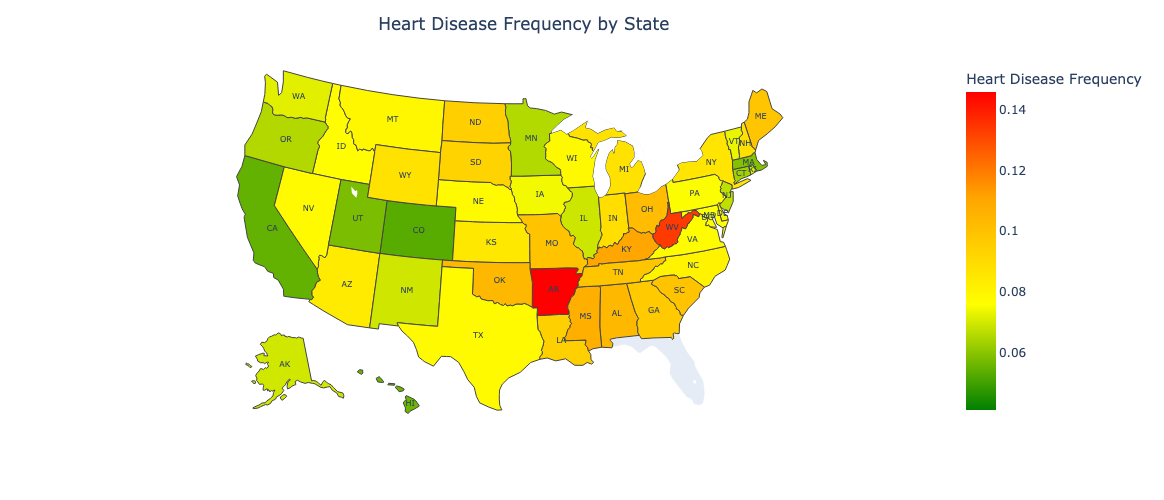

In [141]:
#Plotly function to make Geography graphs! Very cool
fig = px.choropleth(states, #DataFrame
                    locations="States", #Abbreviated State Column
                    locationmode = 'USA-states', #Plotly's set location mode to usa states
                    color="Heart Disease Frequency", #Color based off of frequency
                    color_continuous_scale= ['green', 'yellow', 'orange' ,'red'], #Color scale from low to high frequency, Green is low and red is high
                    scope = 'usa', #Only want to see the US
                    width = 1000, #Size of graph
                    height = 500, #Size of graph
                    )

#Center Title
fig.update_layout(title_text='Heart Disease Frequency by State', title_x=0.45)

#Add State labels
fig.add_scattergeo(
    locations= states['States'],
    locationmode= "USA-states",
    text = states['States'],
    mode = 'text',
    textfont=dict(
            size=8,
            
    ))
fig.show()

In [142]:
#Save it
fig.write_image(f'../graph/states.png')

## Diabetes and Kidney Diseases

In [218]:
disease = []
for kidney, diabetes in zip(df['chckdny2'], df['diabete4']):
    if kidney == 'yes' and diabetes == 'yes':
        disease.append('both')
    elif kidney == 'yes':
        disease.append('kidney')
    elif diabetes == 'yes':
        disease.append('diabetes')
    elif kidney == 'no' and diabetes == 'no':
        disease.append('neither')
    else:
        disease.append('missing')

df['disease'] = disease

In [221]:
df[['chckdny2','diabete4', 'disease']].head()

,chckdny2,diabete4,disease
0,no,no,neither
1,yes,yes,both
2,no,yes,diabetes
3,no,yes,diabetes
4,no,yes,diabetes


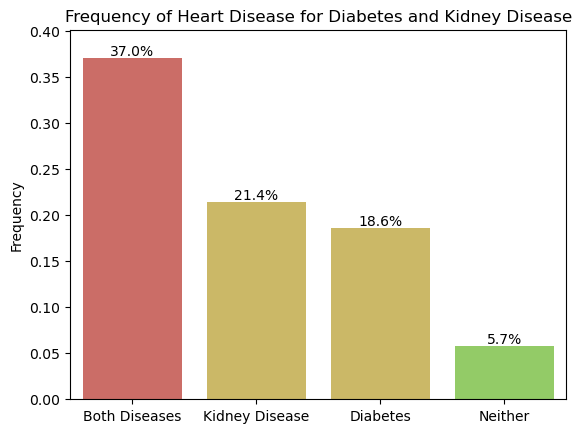

In [396]:
order = ['both', 'kidney', 'diabetes', 'neither']

fig = sns.barplot(data = df, x = 'disease', y = '_michd', errwidth = 0, order = order, palette = [colors[0], colors[1], colors[1], colors[2]])
fig.set_xticklabels(['Both Diseases', 'Kidney Disease', 'Diabetes', 'Neither'])
#plt.xticks(rotation)
fig.bar_label(fig.containers[0], labels = ['37.0%', '21.4%', '18.6%', '5.7%'])
plt.title('Frequency of Heart Disease for Diabetes and Kidney Disease')
plt.xlabel('')
plt.ylabel('Frequency')

plt.savefig(f'../graph/Disease.png');

## Age

In [260]:
age = pd.DataFrame(df.groupby('_age80')['_michd'].mean())
age.reset_index(inplace=True)
age.head()

,_age80,_michd
0,18.0,0.006498
1,19.0,0.008204
2,20.0,0.004422
3,21.0,0.004598
4,22.0,0.004704


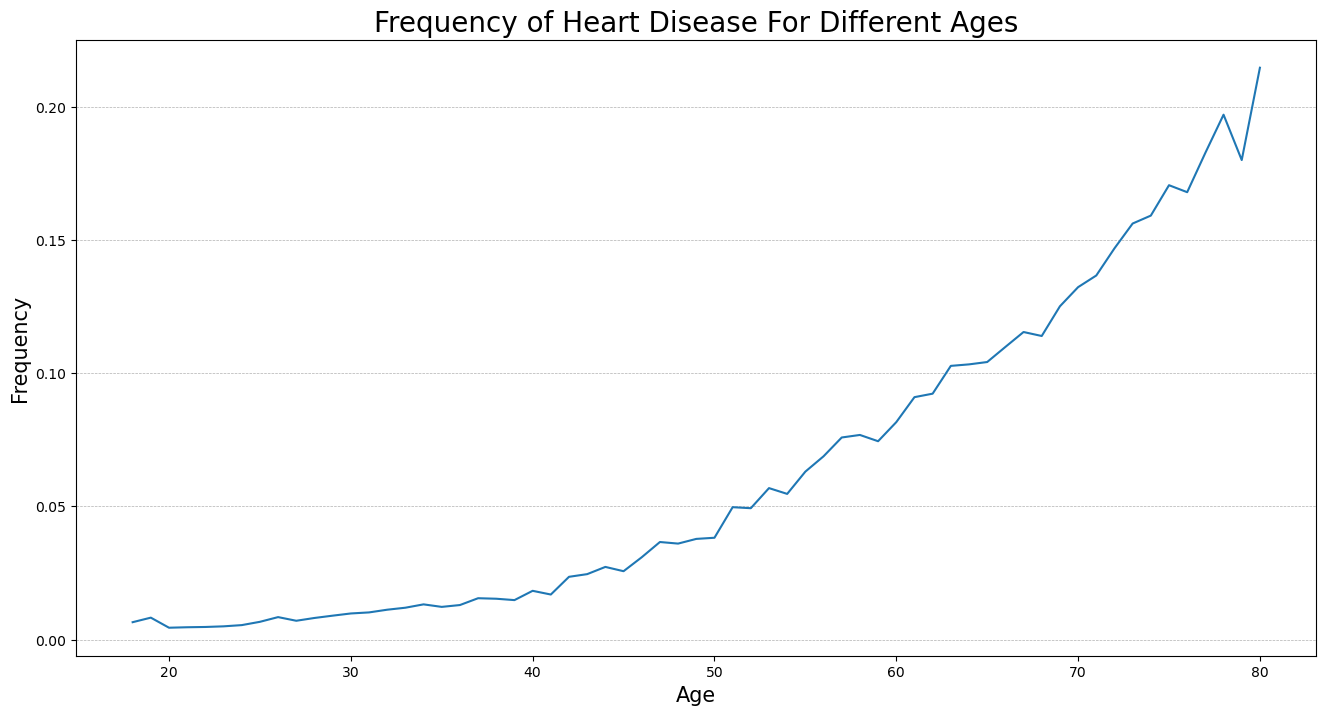

In [397]:
plt.figure(figsize = (16,8))
sns.lineplot(data = age, x = '_age80', y = '_michd', palette = [colors[1]])

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5) #grid
plt.title('Frequency of Heart Disease For Different Ages', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.savefig(f'../graph/Age.png');

In [378]:
incomes = []
for income in df['_incomg1']:
    if income in ['greater_200k', '100k_200k']:
        incomes.append('More than 100k')
    elif income in ['25k_35k', '15k_25k', '50k_100k', '35k_50k', 'less_15k']:
        incomes.append('Less than 100k')
    else:
        incomes.append(None)
        
df['Income'] = incomes

In [379]:
df['Income'].value_counts(dropna=False)

Less than 100k    250200
More than 100k     84730
None               79581
Name: Income, dtype: int64

In [380]:
age_income = pd.DataFrame(df.groupby(['_age80', 'Income'])['_michd'].mean())
age_income.reset_index(inplace=True)
age_income.head(2)

,_age80,Income,_michd
0,18.0,Less than 100k,0.007547
1,18.0,More than 100k,0.004728


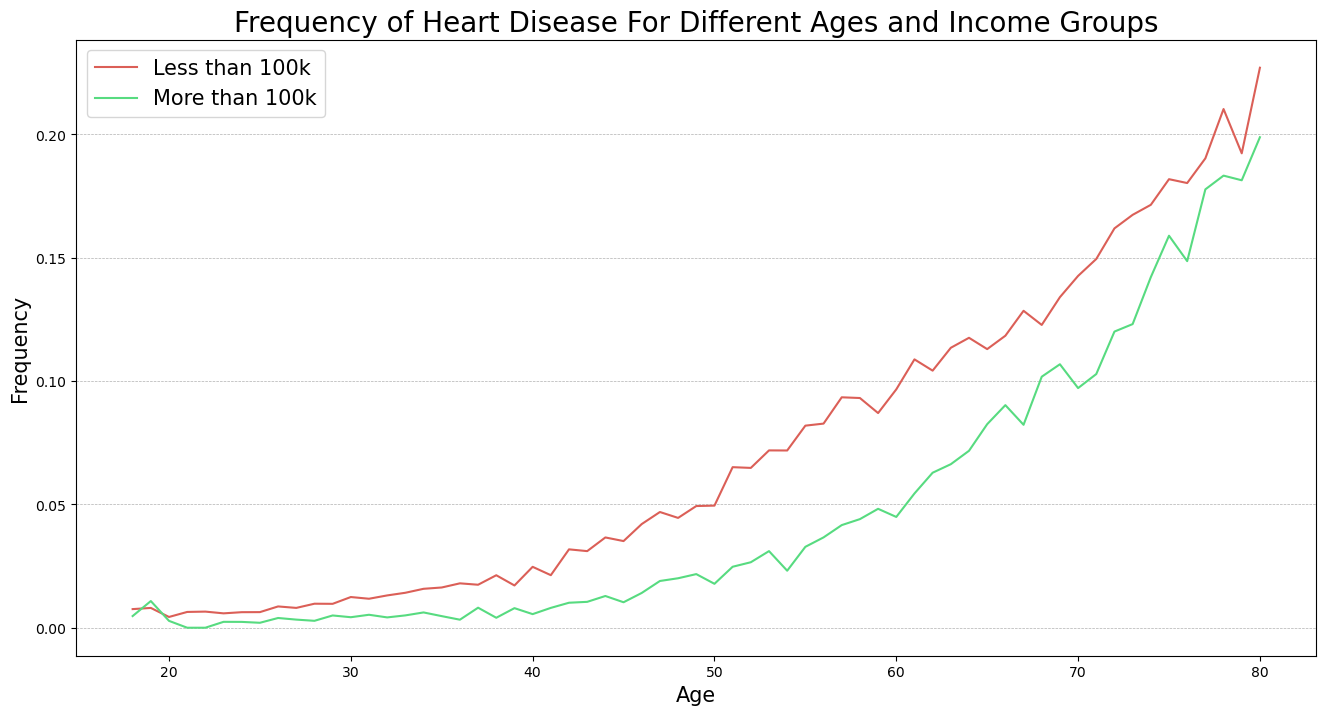

In [398]:
plt.figure(figsize = (16,8))
sns.lineplot(data = age_income, x = '_age80', y = '_michd', hue = 'Income', palette = [colors[0], colors[3]])
plt.legend(loc=2, prop={'size': 15})
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5) #grid
plt.title('Frequency of Heart Disease For Different Ages and Income Groups', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.savefig(f'../graph/Age_Imcome.png');

In [367]:
df['_smoker3'].unique()

array(['former smoker', 'never smoked', 'someday smoker',
       'everday smoker', 'missing'], dtype=object)

In [400]:
smokers = []
for smoker in df['_smoker3']:
    if smoker in ['former smoker', 'someday smoker','everday smoker']:
        smokers.append('Smoker')
    elif smoker in ['never smoked']:
        smokers.append('Non Smoker')
    else:
        smokers.append(None)
        
df['Smoker'] = smokers

df['Smoker'].value_counts(dropna = False)

Non Smoker    244013
Smoker        164927
None            5571
Name: Smoker, dtype: int64

In [401]:
age_smoker = pd.DataFrame(df.groupby(['_age80', 'Smoker'])['_michd'].mean())
age_smoker.reset_index(inplace=True)
age_smoker.head(2)

,_age80,Smoker,_michd
0,18.0,Non Smoker,0.005932
1,18.0,Smoker,0.015152


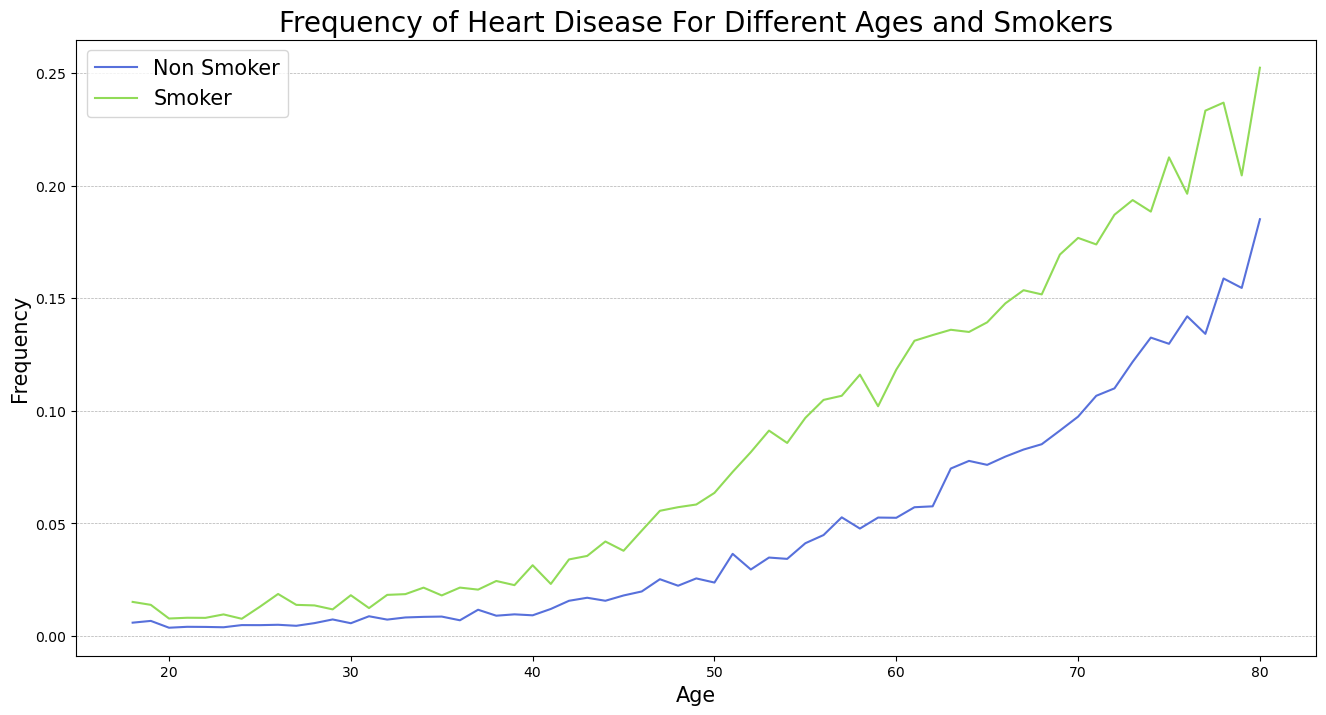

In [402]:
plt.figure(figsize = (16,8))
sns.lineplot(data = age_smoker, x = '_age80', y = '_michd', hue = 'Smoker', palette = [colors[5], colors[2]])
plt.legend(loc=2, prop={'size': 15})
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5) #grid
plt.title('Frequency of Heart Disease For Different Ages and Smokers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.savefig(f'../graph/Age_Smoker.png');

## Smoking

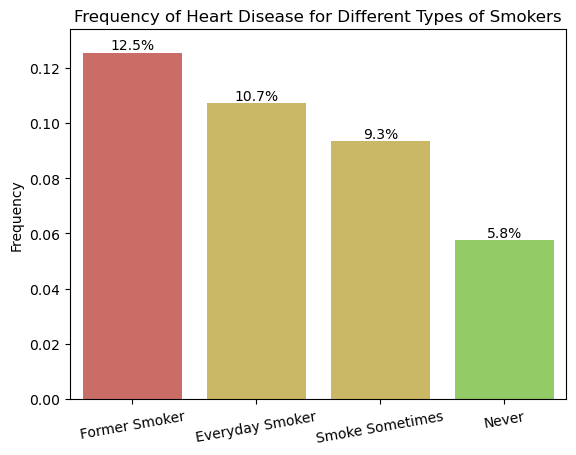

In [403]:
order = ['former smoker', 'everday smoker', 'someday smoker', 'never smoked']

fig = sns.barplot(data = df, x = '_smoker3', y = '_michd', errwidth = 0, order = order, palette = [colors[0], colors[1], colors[1], colors[2]])
fig.set_xticklabels(['Former Smoker', 'Everyday Smoker', 'Smoke Sometimes', 'Never'])
plt.xticks(rotation = 10)
fig.bar_label(fig.containers[0], labels = ['12.5%', '10.7%', '9.3%', '5.8%'])
plt.title('Frequency of Heart Disease for Different Types of Smokers')
plt.xlabel('')
plt.ylabel('Frequency')

plt.savefig(f'../graph/Smoker.png');